In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Observation des 5 premières et 5 dernières lignes du jeu de données 
Data=pd.read_csv("en.openfoodfacts.org.products.csv", sep='\t',error_bad_lines=False, low_memory=False)
Data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = Data.copy()
data.to_csv()

# Définition de quelques fonctions pour évaluer la qualité des données

In [3]:
# Afficher le nombre de ligne
def nombre_ligne(Data):
    return len(Data)

# Afficher le nombre de colonnes
def nombre_columns(Data):
    return len(Data.columns)

# Afficher les valeurs manquants
def valeurs_manquants(Data):
    return Data.isna().sum().sum()

# Affichage du type de variables
def type_variable(Data):
    return Data.dtypes.value_counts()

# Mesurer le pourcentage de valeurs manquants
def pourcentage_valeurs_manquants(Data):
    return (Data.isna().sum()/Data.shape[0]).sort_values(ascending=True)

# Eliminer les variables supérieurs à 80% de valeurs manquants
def nouvel_data(Data):
    return Data[Data.columns[Data.isna().sum()/Data.shape[0] < 0.8] ]

# Le nombre de lignes dupliquées
def nombre_lignes_duplicate(Data):
    return len(Data)-len(Data.drop_duplicates())

## Appel aux différentes fonctions

In [4]:
# Afficher le nombre de ligne
nombre_ligne(Data)

1924617

In [5]:
# Afficher le nombre de colonnes
nombre_columns(Data)

186

In [6]:
# Afficher les valeurs manquants
valeurs_manquants(Data)

285521667

#### On voit qu'on a beaucoup de valeurs manquantes ( beaucoup de NaN )

In [7]:
#Affichage du type de variables
type_variable(Data)

float64    124
object      60
int64        2
dtype: int64

In [8]:
# Afficher le pourcentage de valeurs manquants
pourcentage_valeurs_manquants(Data)

code                         0.0
url                          0.0
created_t                    0.0
created_datetime             0.0
last_modified_t              0.0
                            ... 
ingredients_from_palm_oil    1.0
additives                    1.0
no_nutriments                1.0
allergens_en                 1.0
cities                       1.0
Length: 186, dtype: float64

## Visualisation de tout le dataset (initial)

<AxesSubplot:>

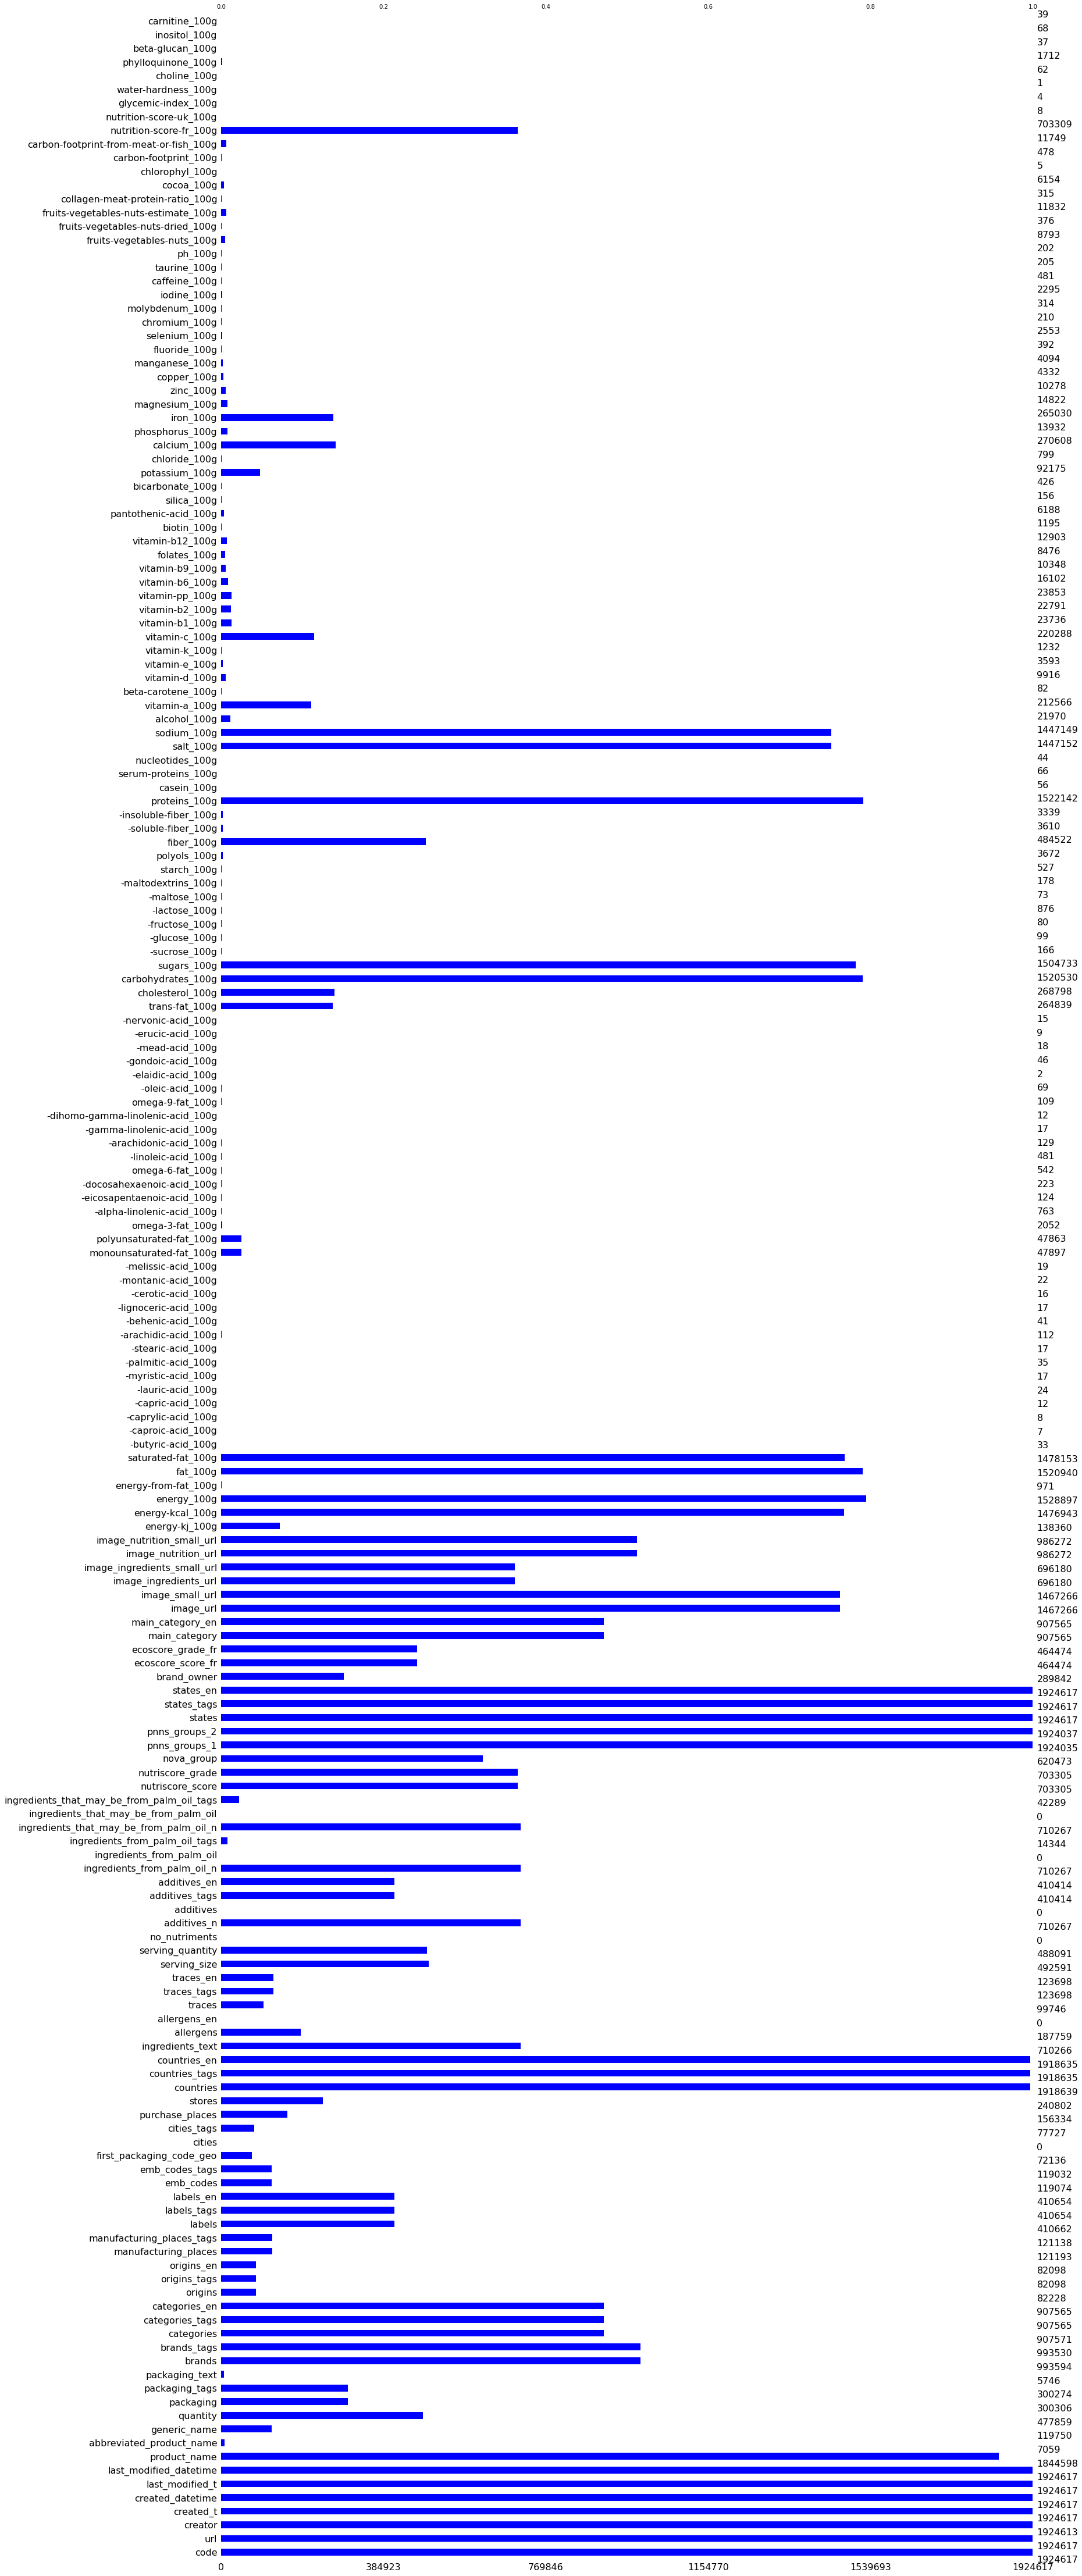

In [9]:
# Visualisation de tout notre dataset
msno.bar(Data, color= "blue")

In [10]:
# Affichage du nouvel dataset aprés suppression de variables à 80% de valeurs manquants
nouvel_data = nouvel_data(Data)
nouvel_data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,endives,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.4,0.56,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,685.8,1.9,1.00,NaN,NaN,NaN,15.3,1.1,0.44,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,3661.0,15.1,6.10,2.6,1.0,NaN,15.7,2.1,0.84,NaN


In [11]:
nouvel_data.shape

(1924617, 57)

Le choix de la suppression de certaines variables s'est faite avec des vaiables qui ont un taux de remplissage faible ou quasi nulle,  on est passé de 186 features à 57 features

### Visualisation du dataset aprés suppression de certaines variables

<AxesSubplot:>

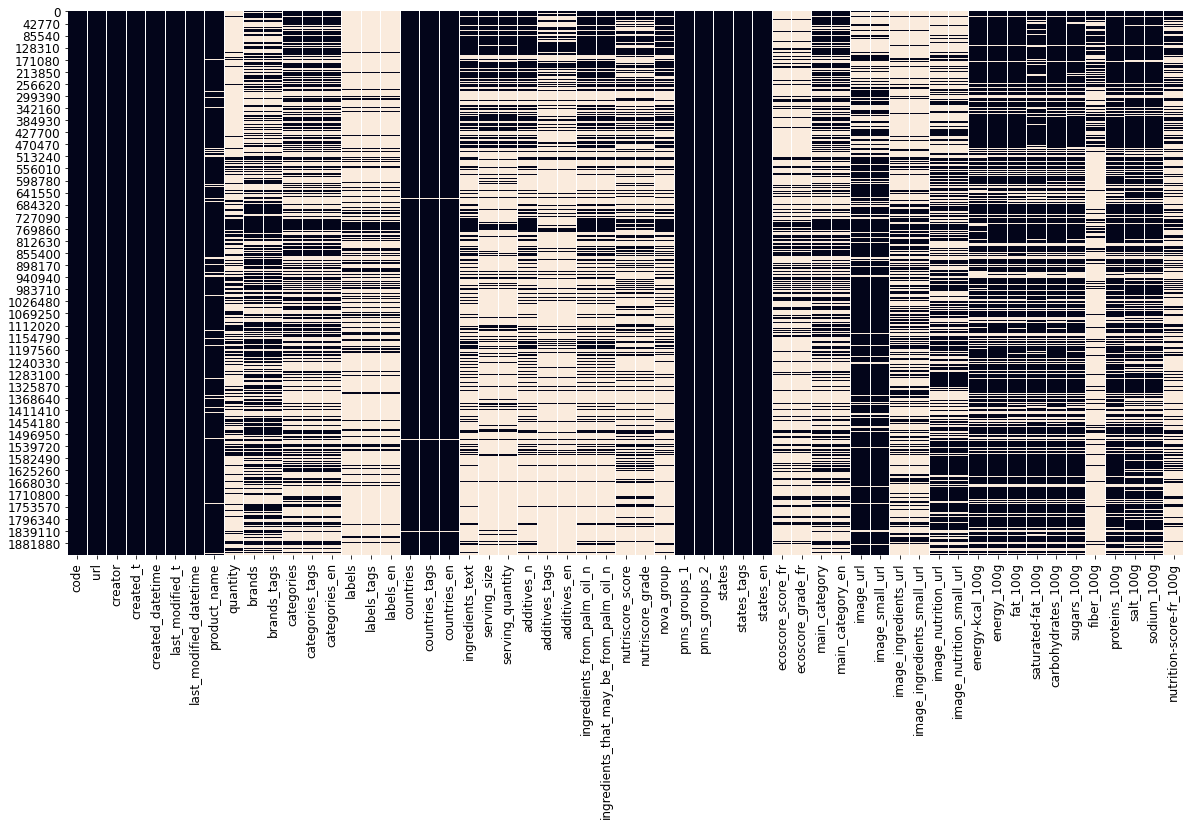

In [12]:
# Visualisation des varibles aprés suppression de variables à 90% de valeurs manquants
plt.figure(figsize=(20,10))
plt.rcParams.update({"font.size":12})
sns.heatmap(nouvel_data.isnull(), cbar=False)

In [13]:
# Appel à la fonction pour afficher le poucentage de chaque variable
pourcentage_valeurs_manquants(nouvel_data)

code                                       0.000000
url                                        0.000000
created_t                                  0.000000
created_datetime                           0.000000
last_modified_t                            0.000000
last_modified_datetime                     0.000000
states_en                                  0.000000
states_tags                                0.000000
states                                     0.000000
creator                                    0.000002
pnns_groups_2                              0.000301
pnns_groups_1                              0.000302
countries                                  0.003106
countries_tags                             0.003108
countries_en                               0.003108
product_name                               0.041577
energy_100g                                0.205610
proteins_100g                              0.209120
fat_100g                                   0.209744
carbohydrate

In [14]:
# la forme du dataset
nouvel_data.shape

(1924617, 57)

### Variables redondantes

####  On a des variables redondantes c'est à dire des variables suffixées par "_en" ou "_tag"  qui ont la même signification   

####  C'est le cas de ces variables : 'categories', 'labels', 'countries', 'states', 'additives_n', et des dates

In [15]:
categories_columns = nouvel_data.loc[:,['categories','categories_tags','categories_en']].sort_values(by="categories")
categories_columns.sample(5)

,categories,categories_tags,categories_en
1247209,NaN,NaN,NaN
231668,"Meals, Pizzas pies and quiches, Pizzas","en:meals,en:pizzas-pies-and-quiches,en:pizzas","Meals,Pizzas pies and quiches,Pizzas"
1264852,NaN,NaN,NaN
1370247,NaN,NaN,NaN
1736557,NaN,NaN,NaN


In [16]:
brands_columns = nouvel_data.loc[:,['brands', 'brands_tags']].sort_values(by="brands")
brands_columns.sample(5)

,brands,brands_tags
1155973,NaN,NaN
1286749,FORTNUM & MASON,fortnum-mason
1445521,Caprimo,caprimo
1015400,Le Comptoir de Mathilde,le-comptoir-de-mathilde
1657619,NaN,NaN


In [17]:
labels_columns = nouvel_data.loc[:,['labels', 'labels_tags', 'labels_en']].sort_values(by="labels")
labels_columns.sample(5)

,labels,labels_tags,labels_en
686798,"en:no-gluten,en:no-added-sugar,en:no-colorings...","en:no-gluten,en:no-added-sugar,en:no-colorings...","No gluten,No added sugar,No colorings,Nutrisco..."
1167077,NaN,NaN,NaN
1571269,NaN,NaN,NaN
1530605,NaN,NaN,NaN
629916,NaN,NaN,NaN


In [18]:
countries_columns = nouvel_data.loc[:,['countries', 'countries_tags', 'countries_en']].sort_values(by="countries")
countries_columns.sample(5)

,countries,countries_tags,countries_en
684326,España,en:spain,Spain
1046688,France,en:france,France
1596678,en:Switzerland,en:switzerland,Switzerland
668214,France,en:france,France
551068,France,en:france,France


In [19]:
states_columns = nouvel_data.loc[:,['states', 'states_tags', 'states_en']].sort_values(by="states")
states_columns.sample(5)

,states,states_tags,states_en
903392,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete..."
494455,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
168049,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
1645147,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."
429195,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr..."


In [20]:
times_columns = nouvel_data.loc[:,['created_datetime','last_modified_datetime','created_t','last_modified_t']].sort_values(by='created_datetime')
times_columns.sample(5)

,created_datetime,last_modified_datetime,created_t,last_modified_t
859501,2018-09-13T09:39:58Z,2020-05-07T08:52:16Z,1536831598,1588841536
205709,2020-04-23T21:07:13Z,2020-04-23T21:07:14Z,1587676033,1587676034
1098655,2021-05-13T14:05:54Z,2021-05-13T14:05:55Z,1620914754,1620914755
1585633,2018-04-11T05:12:28Z,2020-04-02T15:49:35Z,1523423548,1585842575
1874284,2018-04-22T08:12:16Z,2019-07-24T20:31:40Z,1524384736,1564000300


#### On voit avec l'affichage de ces quelques variables la présence de variable redondante, dans ce cas je supprime celles qui sont suffixées par "_tag" ou non suffixées avec la même signification , de même que celle qui sont suffixées par "_t"  qui sont le nombre de seconde et on obetient un nouvau dataset

In [21]:
# Suppression des colonnes 
nouvel_data = nouvel_data.drop(columns=['brands_tags', 'categories',
       'categories_tags', 'labels', 'labels_tags','created_t','last_modified_t',
        'countries', 'countries_tags','states','states_tags'])

In [22]:
# Aprés suppression des colonnes
nouvel_data.reset_index(drop=True).shape

(1924617, 46)

In [23]:
# Le nombre de valeurs distintes dans chaque colonne
nouvel_data.nunique().sort_values(ascending=False)

url                                        1924609
code                                       1924608
created_datetime                           1673488
last_modified_datetime                     1511503
image_url                                  1467111
image_small_url                            1467111
product_name                               1201945
image_nutrition_small_url                   986237
image_nutrition_url                         986237
image_ingredients_url                       696148
image_ingredients_small_url                 696148
ingredients_text                            597912
brands                                      174273
additives_tags                               97099
additives_en                                 97099
categories_en                                68401
labels_en                                    56980
serving_size                                 46495
quantity                                     36531
main_category_en               

In [24]:
# Le nombre de valeurs unique
count_data=nouvel_data.nunique().sort_values(ascending=False)

<AxesSubplot:title={'center':'Distribution de notre jeu de données'}>

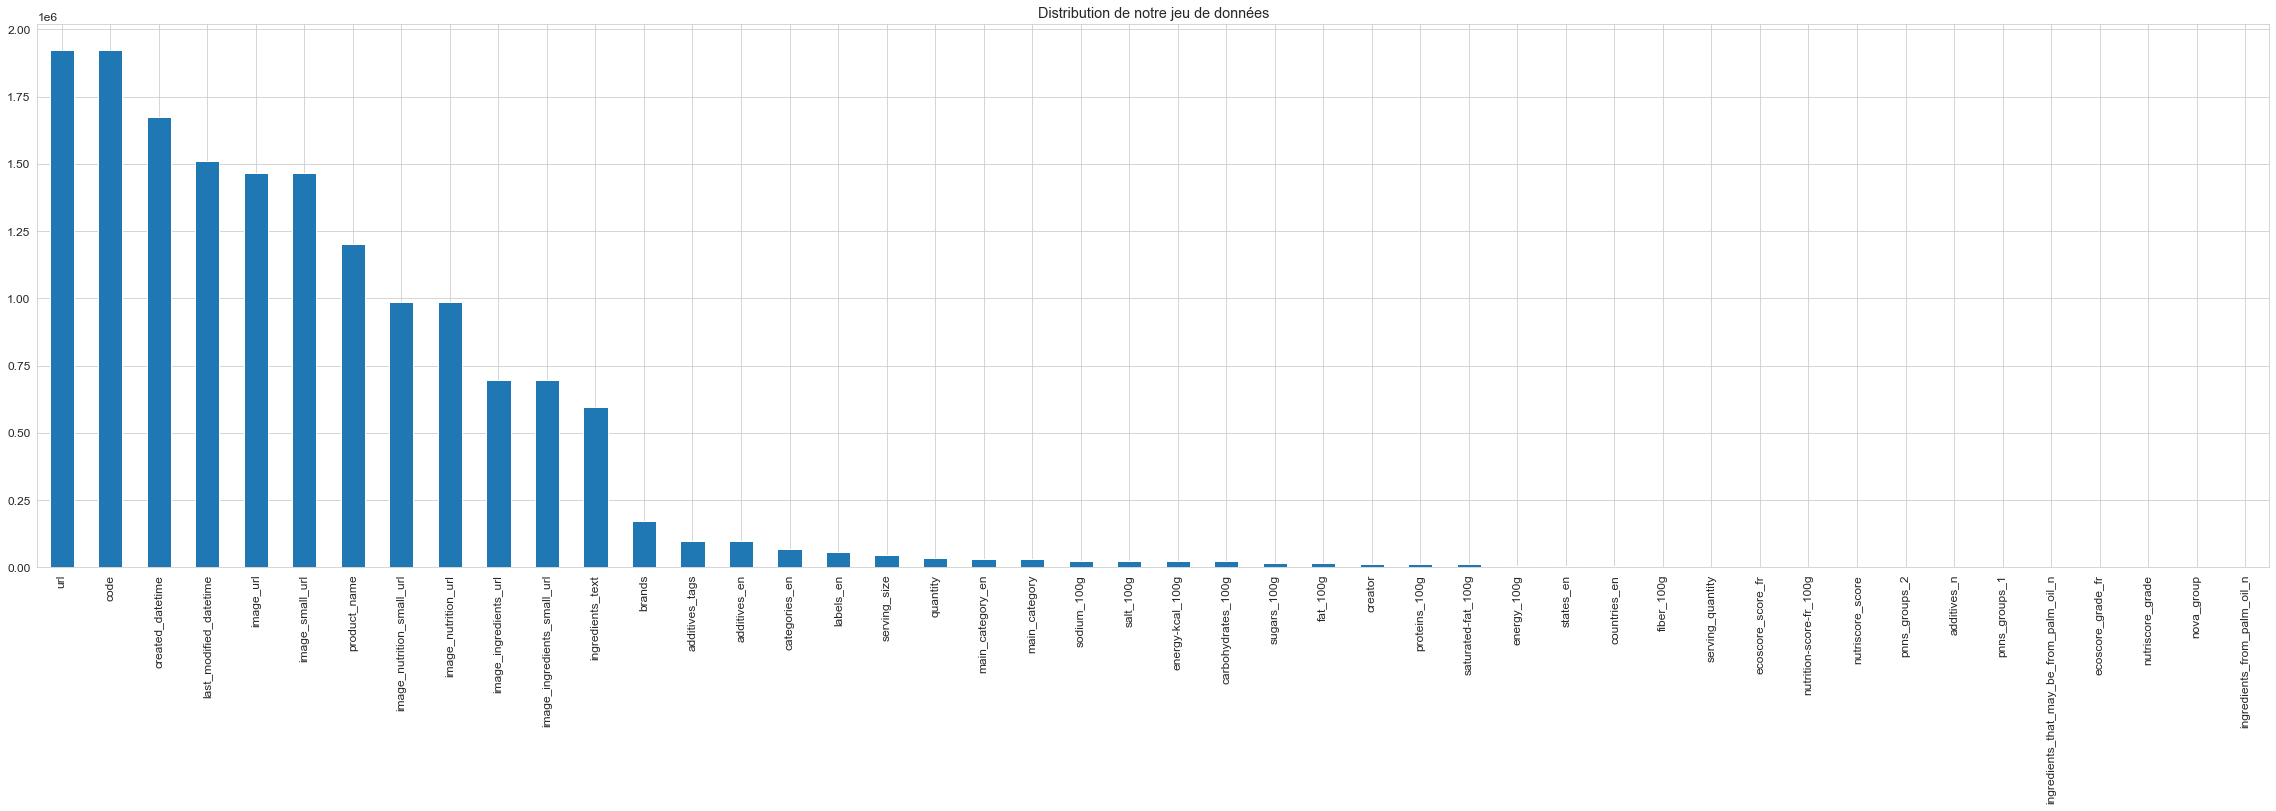

In [25]:
# Visualisation de la distribution du jeu de données
sns.set_style("whitegrid")
plt.figure(figsize=(40,10))
count_data.plot(kind="bar", style="b", title="Distribution de notre jeu de données")

In [26]:
# Nombre de doublons du dataset
nombre_lignes_duplicate(Data)

1

### Séparation des variables qualitatives et variables quantitatives pour les étudier

In [27]:
num_data= nouvel_data.select_dtypes(include=["int64","float"])
cat_data= nouvel_data.select_dtypes("object")

In [28]:
# afficher toutes nos colonnes de chaque variable
pd.set_option("display.max_column",28)

In [29]:
# Variables qualitatives
cat_data.head()

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,brands,categories_en,labels_en,countries_en,ingredients_text,serving_size,additives_tags,additives_en,nutriscore_grade,pnns_groups_1,pnns_groups_2,states_en,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,2021-06-16T14:53:28Z,2021-06-16T14:53:29Z,jeunes pousses,NaN,endives,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15T10:38:00Z,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,2018-10-13T21:06:14Z,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2019-11-19T15:02:16Z,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,NaN,NaN,Spain,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2021-04-27T05:38:15Z,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,Spain,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...


In [30]:
cat_data["ingredients_text"].nunique()

597912

In [31]:
cat_data["serving_size"].nunique()

46495

In [32]:
# Variables quantitatives
num_data.head()

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,ecoscore_score_fr,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.0,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.4,0.56,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.9,685.8,1.9,1.00,NaN,NaN,NaN,15.3,1.1,0.44,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,874.9,3661.0,15.1,6.10,2.6,1.0,NaN,15.7,2.1,0.84,NaN


## Etude des variables qualitatives

In [33]:
# Afficher les colonnes
cat_data.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'quantity', 'brands', 'categories_en', 'labels_en',
       'countries_en', 'ingredients_text', 'serving_size', 'additives_tags',
       'additives_en', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2',
       'states_en', 'ecoscore_grade_fr', 'main_category', 'main_category_en',
       'image_url', 'image_small_url', 'image_ingredients_url',
       'image_ingredients_small_url', 'image_nutrition_url',
       'image_nutrition_small_url'],
      dtype='object')

In [34]:
# Somme des valeurs manquantes par colonnes
cat_data.isnull().sum().sort_values()

code                                 0
url                                  0
created_datetime                     0
last_modified_datetime               0
states_en                            0
creator                              4
pnns_groups_2                      580
pnns_groups_1                      582
countries_en                      5982
product_name                     80019
image_small_url                 457351
image_url                       457351
brands                          931023
image_nutrition_small_url       938345
image_nutrition_url             938345
main_category                  1017052
main_category_en               1017052
categories_en                  1017052
ingredients_text               1214351
nutriscore_grade               1221312
image_ingredients_url          1228437
image_ingredients_small_url    1228437
serving_size                   1432026
quantity                       1446758
ecoscore_grade_fr              1460143
labels_en                

In [35]:
# Somme totale de toutes les valeurs nulles par lignes 
cat_data.isnull().all(axis=1).sum()

0

In [36]:
# Somme totale de toutes les valeurs nulles par colonnes
cat_data.isnull().all(axis=0).sum()

0

### Les variables images

In [37]:
cat_image = cat_data.loc[:,["url","image_url","image_small_url","image_ingredients_url","image_ingredients_small_url","image_nutrition_url","image_nutrition_small_url"]].sort_values(by="image_url")
cat_image.sample(5)

,url,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
1395359,http://world-en.openfoodfacts.org/product/5901...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
257186,http://world-en.openfoodfacts.org/product/0082...,NaN,NaN,NaN,NaN,NaN,NaN
817124,http://world-en.openfoodfacts.org/product/3276...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN
1230187,http://world-en.openfoodfacts.org/product/4388...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...
668931,http://world-en.openfoodfacts.org/product/2860...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN


#### On voit que dans ces variables des liens des images de produits , donc ces variables ne semblent pas pertinentes pour la suite de notre analyse, on peut les supprimer

In [38]:
cat_data= cat_data.drop(columns=["url","image_url","image_small_url","image_ingredients_url","image_ingredients_small_url","image_nutrition_url","image_nutrition_small_url"])

### Variable " code "

In [39]:
# afficher le nombre de doublons
cat_data["code"].duplicated().sum()

9

In [40]:
# Suppression des doublons dans la variable code
cat_data = cat_data.drop_duplicates(["code"]).reset_index(drop=True)

### Variables "	nutriscore_grade " et "ecoscore_grade_fr"

In [41]:
nutriscore_columns = cat_data.loc[:,["nutriscore_grade","ecoscore_grade_fr"]].sort_values(by="nutriscore_grade")
nutriscore_columns.sample(5)

,nutriscore_grade,ecoscore_grade_fr
1768655,d,d
76896,c,NaN
734868,NaN,NaN
698674,a,NaN
697988,NaN,d


In [42]:
nutriscore_columns.nunique()

nutriscore_grade     5
ecoscore_grade_fr    5
dtype: int64

<AxesSubplot:ylabel='ecoscore_grade_fr'>

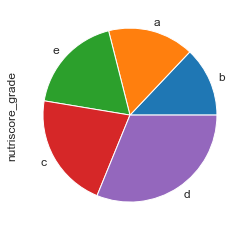

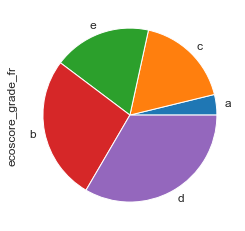

In [43]:
# Visualisation de nutriscore_grade et ecoscore_grade_fr
cat_data["nutriscore_grade"].value_counts(ascending = True).plot.pie()  
plt.figure()   
cat_data["ecoscore_grade_fr"].value_counts(ascending = True).plot.pie() 

Aprés visualisation des deux variables, on voit qu'ils ont pratiquement le même taux de remplissage , dans ce cas je garde la variable "nutriscore_grade" pour la suite de l'analyse.

In [44]:
# Convertir les valeurs en minuscule en majuscule
cat_data["nutriscore_grade"]= cat_data["nutriscore_grade"].str.upper()

In [45]:
# Suppression de "ecoscore_grade_fr"
cat_data = cat_data.drop("ecoscore_grade_fr", axis = 1)

### Variable "Product_name "

In [46]:
# Le nombre de valeurs singuliers
cat_data['product_name'].unique()

array(['jeunes pousses', 'Vitória crackers', 'Cacao', ..., 'Fati',
       'Light & Free SKYR A BOIRE', 'Signal Toothpaste'], dtype=object)

In [47]:
# La somme des valeurs singuliers
cat_data['product_name'].nunique()

1201944

In [48]:
# Le nombre d'observation de chaque antité 
count_prod = cat_data['product_name'].value_counts()
count_prod

Aceite de oliva virgen extra               1324
Miel                                       1292
Filet de poulet                            1055
Comté                                       941
Ice cream                                   757
                                           ... 
Corolla di farro con cioccolato e cocco       1
Butter Mint Rolls                             1
Bio Thé Vert Gunpowder                        1
Pizza aux  lardons                            1
Coquilles saint-jacques Argel                 1
Name: product_name, Length: 1201944, dtype: int64

In [49]:
# Somme totale des doublons 
cat_data['product_name'].duplicated().sum()

722663

<AxesSubplot:>

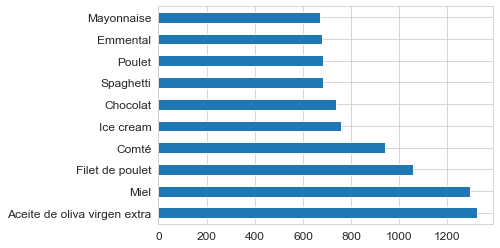

In [50]:
# Visualisation des 10 derniers produits
sns.set_style("whitegrid")
top_product = cat_data['product_name'].value_counts().sort_values(ascending=False).head(10)
top_product.plot(kind="barh") 

<AxesSubplot:>

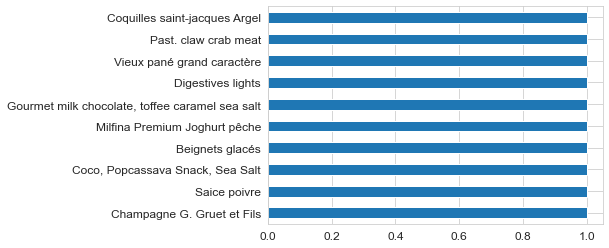

In [51]:
# Visualisation des 10 derniers produits
sns.set_style("whitegrid")
last_product = cat_data['product_name'].value_counts().sort_values(ascending=False).tail(10)
last_product.plot(kind="barh") 

### Variable " brands "

In [52]:
# Le nombre de valeurs singulier
cat_data['brands'].unique()

array(['endives', nan, 'courte paille', ..., 'miellerie de la natouze',
       'Biocoop Bordeaux lac', 'King Elephant'], dtype=object)

In [53]:
# La somme des valeurs singuliers
cat_data['brands'].nunique()

174272

In [54]:
# Le nombre d'observation de chaque antité 
count_brand = cat_data['brands'].value_counts()

In [55]:
# Somme totale des doublons 
cat_data['brands'].duplicated().sum()

1750335

<AxesSubplot:>

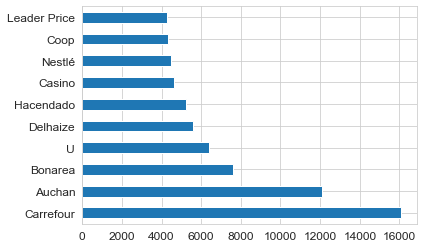

In [56]:
# Visualisation des 10 meilleurs marques
sns.set_style("whitegrid")
top_brand = cat_data['brands'].value_counts().sort_values(ascending=False).head(10)
top_brand.plot(kind="barh") 

<AxesSubplot:>

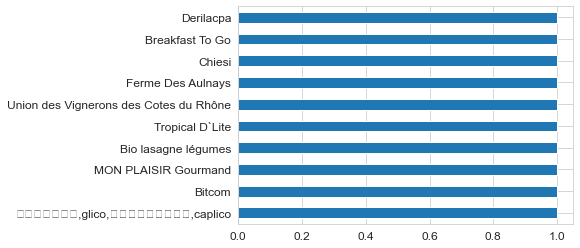

In [57]:
# Visualisation des 10 derniers marques
sns.set_style("whitegrid")
last_brand = cat_data['brands'].value_counts().sort_values(ascending=False).tail(10)
last_brand.plot(kind="barh") 

In [58]:
product_brands = cat_data.loc[:,["product_name", "brands"  ]].sort_values(by="brands")
product_brands.sample(5)

,product_name,brands
83473,"Shrimp scampi plump, tender shrimp, vine-ripen...",Michael Angelo's
1584362,Latte Benessere Cuore,NaN
452486,PÜR GUM,NaN
862143,Tarama,L’apero Du Poissonnier
104670,"Apple cinnamon fruit & grain, apple cinnamon",NaN


In [59]:
cat_data[(cat_data["product_name"].isnull()==False) &
            (cat_data["brands"].isnull()==False)].groupby(by=["product_name","brands"])["code"].nunique().sort_values(ascending=False)

product_name                  brands                 
Burger vegetariana            Bonarea                    262
Filet de poulet               La Nouvelle Agriculture    221
Burger vegana                 Bonarea                    185
Filets de poulet              La Nouvelle Agriculture    140
Queso semicurado              Entrepinares               121
                                                        ... 
Fusili integrali              Il Viaggiator Goloso         1
Fusili n°48 Integrale         Rummo                        1
Fusili pasta                  Ecor                         1
Fusili pasta di gragnano igp  Conad                        1
🤬                             🤬                            1
Name: code, Length: 887360, dtype: int64

##### Suppression de ces produits et marque dans le dataset 🤬 

In [60]:
cat_data = cat_data[(cat_data["product_name"]!="🤬") 
              & (cat_data["brands"]!="🤬")].reset_index(drop=True)

In [61]:
# Suppression des doublons sur product_name et brands en conservant les valeurs nulles
cat_data = cat_data[(~cat_data.duplicated(["product_name","brands"])) 
      | ((cat_data['product_name'].isnull()) & (nouvel_data['brands'].isnull()))].reset_index(drop=True)

### Variables " created_datatime " 

####  Visualisons la date de créations des produits par anneés

### Variable " countries "

In [62]:
# Le nombre de valeurs singuliers
cat_data["countries_en"].unique()

array(['France', 'Spain', 'United States', ..., 'Switzerland,Singapour',
       'Algeria,Egypt,Malaysia,Morocco,Saudi Arabia,Syria,Tunisia',
       'Bulgaria,Cyprus,Czech Republic,Greece'], dtype=object)

In [63]:
# La somme des valeurs singuliers
cat_data["countries_en"].nunique()

3839

In [64]:
cat_data["countries_en"].value_counts()

France                                                                                           596138
United States                                                                                    301534
Spain                                                                                            154871
Italy                                                                                             68412
Germany                                                                                           62897
                                                                                                  ...  
Australia,China,France,French Polynesia,New Zealand,United States                                     1
Belgium,Germany,Netherlands,Spain                                                                     1
Algeria,Morocco,Portugal,Spain,Tunisia                                                                1
Czech Republic,Estonia,Hungary,Latvia,Lithuania,Poland,Russia,Sl

<AxesSubplot:>

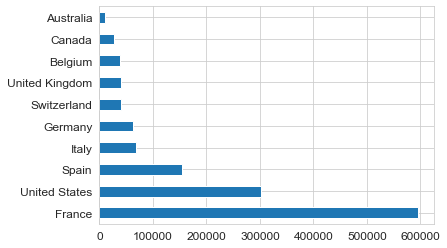

In [65]:
# Visualisation des 10 meilleurs pays
sns.set_style("whitegrid")
top_countries = cat_data["countries_en"].value_counts().sort_values(ascending=False).head(10)
top_countries.plot(kind="barh")    

<AxesSubplot:>

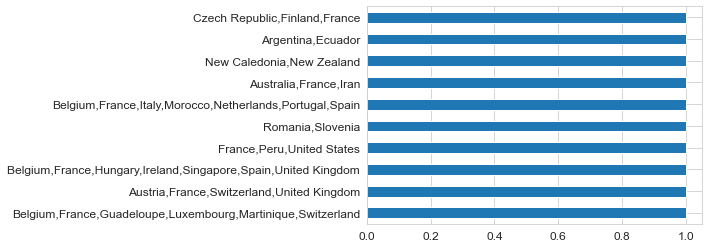

In [66]:
# Visualisation des 10 derniers pays du classements
sns.set_style("whitegrid")
last_countries = cat_data["countries_en"].value_counts().sort_values(ascending=False).tail(10)
last_countries.plot(kind="barh")

On voit c'est la France et les Etats Unis sont les plus représentés dans le Dataset

In [67]:
# Groupons les pays par code
countries = cat_data.groupby(["countries_en"])[["code"]].nunique()
countries

,code
countries_en,
0,1
Afghanistan,8
"Afghanistan,Belgium,France",2
"Afghanistan,France",124
"Afghanistan,France,French Guiana",1
...,...
المانيا,1
المغرب,1
ایران,1


### Les variables " additives_en " et " additives_tags "

In [68]:
additives_columns = cat_data.loc[:,['additives_en','additives_tags']].sort_values(by='additives_en')
additives_columns.sample(5)

,additives_en,additives_tags
1053332,NaN,NaN
237926,NaN,NaN
751580,NaN,NaN
1427958,E621 - Monosodium glutamate,en:e621
1438835,NaN,NaN


In [69]:
# le nombre valeur singulier
cat_data["additives_en"].unique()

array([nan,
       'E150 - Caramel,E160a - Carotene,E202 - Potassium sorbate,E316 - Sodium erythorbate,E466 - Sodium carboxy methyl cellulose',
       'E406 - Agar', ...,
       'E160a - Carotene,E330 - Citric acid,E414 - Acacia gum,E473 - Sucrose esters of fatty acids',
       'E150c - Ammonia caramel,E319 - Tertiary-butylhydroquinone (tbhq),E339 - Sodium phosphates,E339i - Monosodium phosphate,E452 - Polyphosphates,E452i - Sodium polyphosphate,E452vi - Sodium tripolyphosphate,E621 - Monosodium glutamate,E627 - Disodium guanylate,E631 - Disodium inosinate',
       'E1520 - Propylene Glycol,E211 - Sodium benzoate,E330 - Citric acid,E415 - Xanthan gum,E460 - Cellulose,E460i - Microcrystalline cellulose,E955 - Sucralose'],
      dtype=object)

In [70]:
# La somme des valeurs singuliers
cat_data["additives_en"].nunique()

90224

In [71]:
# le nombre valeur singulier
cat_data["additives_tags"].unique()

array([nan, 'en:e150,en:e160a,en:e202,en:e316,en:e466', 'en:e406', ...,
       'en:e160a,en:e330,en:e414,en:e473',
       'en:e150c,en:e319,en:e339,en:e339i,en:e452,en:e452i,en:e452vi,en:e621,en:e627,en:e631',
       'en:e1520,en:e211,en:e330,en:e415,en:e460,en:e460i,en:e955'],
      dtype=object)

In [72]:
# La somme des valeurs singuliers
cat_data["additives_tags"].nunique()

90224

On voit aprés affichage des deux variables , "additives_tags"  est composée seulement de ses numéros qui servent à identifier les additifs et "additives_en" est composée de son nom et de numéro, dans ce cas je garde "additives_en"

In [73]:
# Suppression de additives_tags
cat_data.drop("additives_tags", axis= 1, inplace=True)

### Les catégories de produits avec les pnns_groups qui nous apportent plus de précision

In [74]:
cat_produit = cat_data.loc[:,["categories_en", "pnns_groups_1", "pnns_groups_2", "main_category_en" ]].sort_values(by="categories_en")
cat_produit.sample(5)

,categories_en,pnns_groups_1,pnns_groups_2,main_category_en
1285811,NaN,unknown,unknown,NaN
1343092,es:filetes-de-melva,unknown,unknown,es:filetes-de-melva
232397,"Groceries,Sauces",Fat and sauces,Dressings and sauces,Sauces
1248387,NaN,unknown,unknown,NaN
518621,NaN,unknown,unknown,NaN


In [75]:
# Le nombre de produits présent
len(cat_produit)

1528691

In [76]:
# la somme de chaque valeur singulier
cat_produit.nunique()

categories_en       66033
pnns_groups_1          12
pnns_groups_2          42
main_category_en    30404
dtype: int64

In [77]:
# Le nombre de valeurs distinct dans "pnns_groups_1"
cat_produit["pnns_groups_1"].unique()

array(['unknown', 'Sugary snacks', 'Beverages', 'Alcoholic beverages',
       'Milk and dairy products', 'Fat and sauces', nan, 'Fish Meat Eggs',
       'Salty snacks', 'Composite foods', 'Cereals and potatoes',
       'Fruits and vegetables', 'sugary-snacks'], dtype=object)

In [78]:
# Le nombre de valeurs distinct dans "pnns_groups_2"
cat_produit["pnns_groups_2"].unique()

array(['unknown', 'Biscuits and cakes', 'Plant-based milk substitutes',
       'Unsweetened beverages', 'Sweetened beverages',
       'Artificially sweetened beverages', 'Alcoholic beverages',
       'Cheese', 'Teas and herbal teas and coffees', 'Milk and yogurt',
       'Ice cream', 'Dressings and sauces', 'Waters and flavored waters',
       'Meat', 'Fish and seafood', 'Appetizers', 'One-dish meals',
       'Chocolate products', 'Sweets', 'Pastries', 'Eggs',
       'Pizza pies and quiches', 'Salty and fatty products', 'Sandwiches',
       'Dairy desserts', 'Fats', 'Offals', 'Processed meat', 'Potatoes',
       'Pizza pies and quiche', 'Fruit juices', 'Fruit nectars',
       'Cereals', 'Fruits', 'Vegetables', 'Breakfast cereals',
       'Dried fruits', 'Soups', 'Nuts', 'Legumes', 'Bread', 'pastries',
       nan], dtype=object)

In [79]:
# Le nombre de valeurs distinct dans "categories_en"
cat_produit["categories_en"].unique()

array(['0', '0-88', '00', ..., '𝘱𝘰𝘵𝘪𝘵𝘰', '🍞', nan], dtype=object)

In [80]:
# Le nombre de valeurs distinct dans "main_category_en"
cat_produit["main_category_en"].unique()

array(['0', '0-88', '00', ..., '𝘱𝘰𝘵𝘪𝘵𝘰', '🍞', nan], dtype=object)

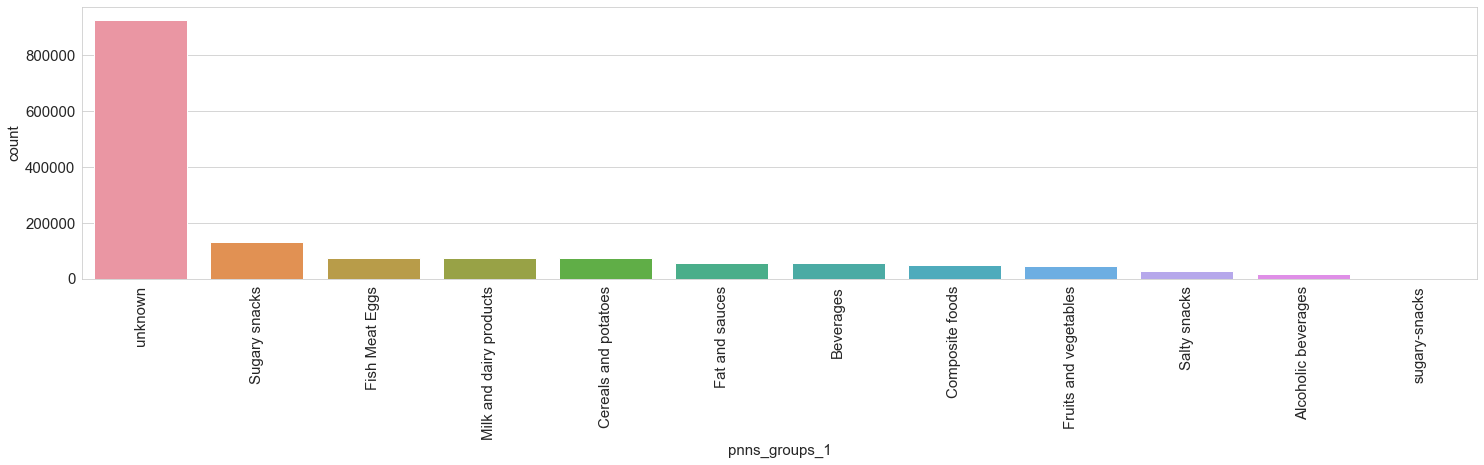

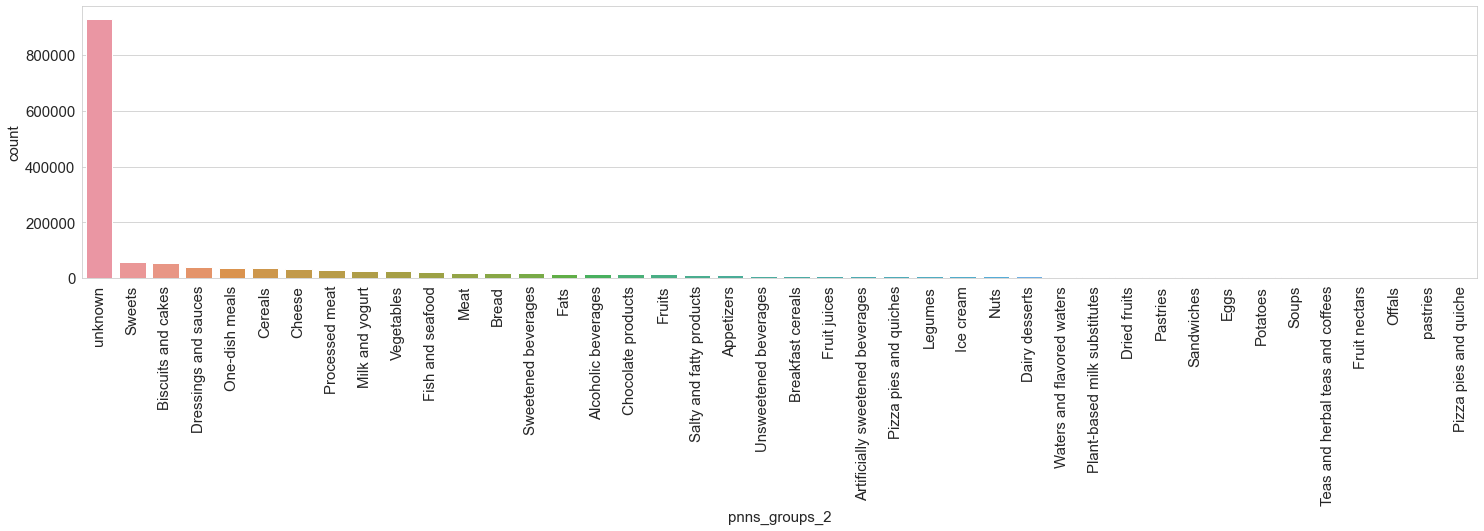

In [81]:
# Visualisation des deux pnns_groups
plt.rcParams.update({ "font.size" : 15})
sns.set_style("whitegrid")
plt.figure(figsize=(25,5))
sns.countplot(cat_produit["pnns_groups_1"], order=cat_produit["pnns_groups_1"].value_counts(ascending=False).index)
plt.xticks(rotation=90);

plt.rcParams.update({ "font.size" : 15})
plt.figure(figsize=(25,5))
sns.countplot(cat_produit["pnns_groups_2"], order=cat_produit["pnns_groups_2"].value_counts(ascending=False).index)
plt.xticks(rotation=90);

<AxesSubplot:>

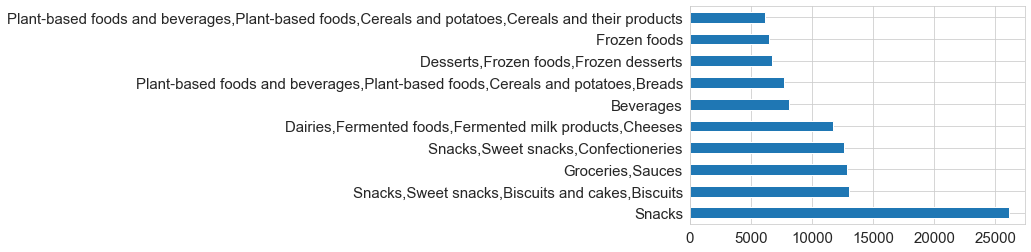

In [82]:
# Visualisation des 10 meilleurs catégories de produit
sns.set_style("whitegrid")
top_categories = cat_data["categories_en"].value_counts().sort_values(ascending=False).head(10)
top_categories.plot(kind="barh")    

<AxesSubplot:>

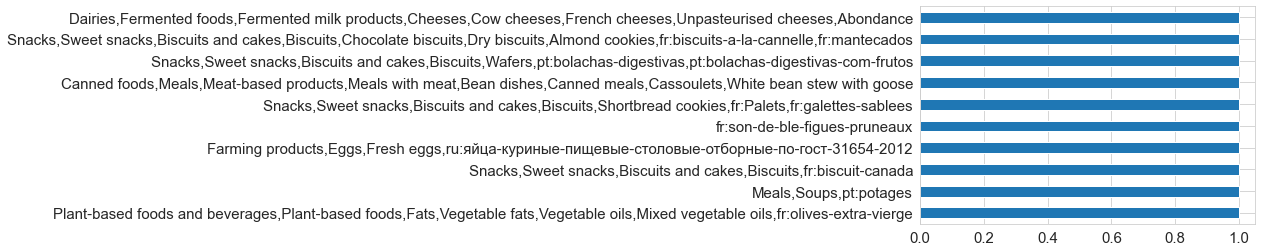

In [83]:
# Visualisation des 10 derniers catégories de produit
sns.set_style("whitegrid")
last_categories = cat_data["categories_en"].value_counts().sort_values(ascending=False).tail(10)
last_categories.plot(kind="barh") 

<AxesSubplot:>

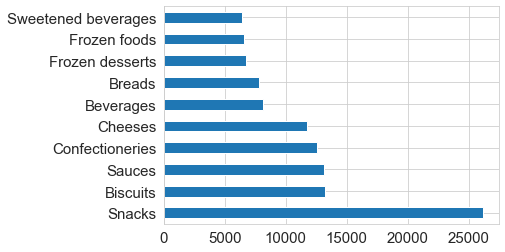

In [84]:
# Visualisation des 10 meilleurs catégories de produit
sns.set_style("whitegrid")
top_main = cat_data["main_category_en"].value_counts().sort_values(ascending=False).head(10)
top_main.plot(kind="barh")    

<AxesSubplot:>

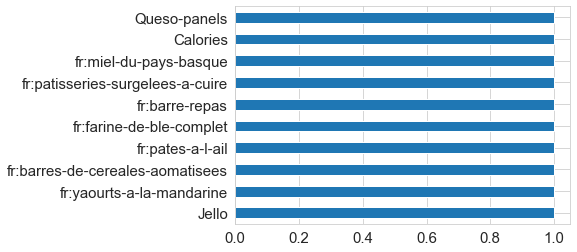

In [85]:
# Visualisation des 10 meilleurs catégories de produit
sns.set_style("whitegrid")
last_main = cat_data["main_category_en"].value_counts().sort_values(ascending=False).tail(10)
last_main.plot(kind="barh") 

Nous allons supprimer tous les produits qui n'ont ni nom, ni catégorie et qui ne pourront donc être clairement identifiés.

In [86]:
cat_data = cat_data[~((cat_data.product_name.isnull()) 
                        & ((cat_data.pnns_groups_1 == "unknown") 
                           | (cat_data.main_category_en == "unknown")))]

In [87]:
cat_data[((cat_data.pnns_groups_1 == "unknown") & (cat_data.main_category_en == "unknown") &
              (cat_data.pnns_groups_2 == "unknown") & (cat_data.categories_en == "unknown"))].shape[0]

0

In [88]:
# Convertir les valeurs en minuscule et les tirets en espace
cat_data["pnns_groups_1"]= cat_data["pnns_groups_1"].str.lower().str.replace("-"," ").str.replace('sugary-snacks','sugary snacks')

In [89]:
# Convertir les valeurs en minuscule et les tirets en espace
cat_data["pnns_groups_2"] = cat_data["pnns_groups_2"].str.lower().str.replace("-"," ").str.replace('Pizza pies and quiche',
                                                                                                         'Pizza pies and quiches')

In [90]:
# Convertir les valeurs en minuscule et les tirets en espace
cat_data["categories_en"] =cat_data["categories_en"].str.lower().str.replace("-"," ")

In [91]:
# Omission des valeurs unknown
cat_produit= cat_produit[cat_produit[cat_produit.columns]!="unknown"].reset_index(drop=True) 

In [92]:
# Omission des valeurs unknown
cat_data= cat_data[cat_data[cat_data.columns]!="unknown"].reset_index(drop=True) 

In [93]:
# Affifcher 5 lignes aléatoires 
cat_produit.sample(5)

,categories_en,pnns_groups_1,pnns_groups_2,main_category_en
392486,"Plant-based foods and beverages,Plant-based fo...",Cereals and potatoes,Bread,Breads
589630,Snacks,NaN,NaN,Snacks
1397915,NaN,NaN,NaN,NaN
892241,NaN,NaN,NaN,NaN
1510969,NaN,NaN,NaN,NaN


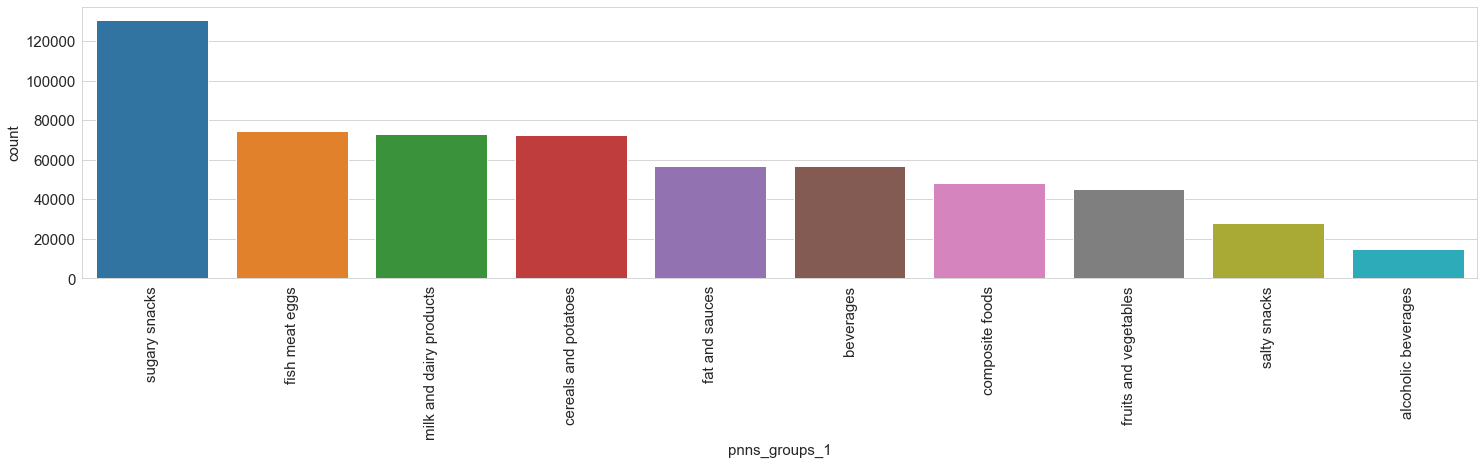

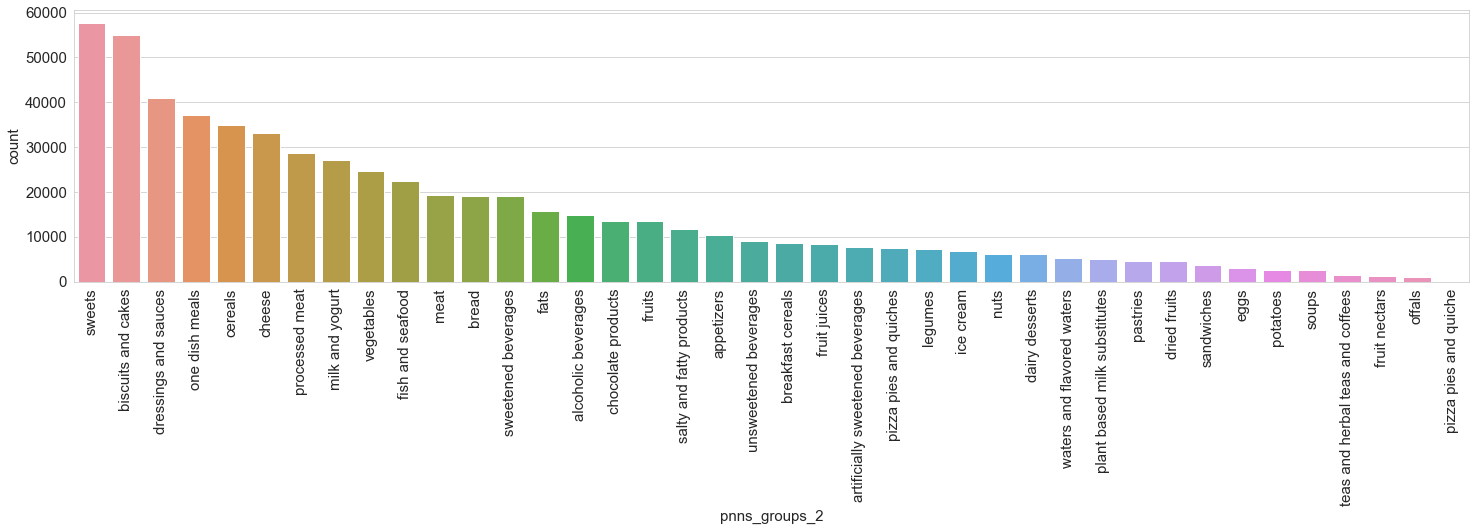

In [94]:
# Visualisation des deux pnns_groups
sns.set_style("whitegrid")
plt.figure(figsize=(25,5))
sns.countplot(cat_data["pnns_groups_1"], order=cat_data["pnns_groups_1"].value_counts(ascending=False).index)
plt.xticks(rotation=90);


plt.figure(figsize=(25,5))
sns.countplot(cat_data["pnns_groups_2"], order=cat_data["pnns_groups_2"].value_counts(ascending=False).index)
plt.xticks(rotation=90);

In [95]:
# Somme des valeurs nulles par colonne
cat_produit.isnull().sum()

categories_en       785430
pnns_groups_1       927976
pnns_groups_2       927974
main_category_en    785430
dtype: int64

In [96]:
# Omission des valeurs "🍞"
cat_data = cat_data[cat_data["categories_en"]!= "🍞"].reset_index(drop=True)

### Variables " ingrédients_text " et "serving_size"

In [97]:
# Le nombre de valeurs distintes
cat_data["ingredients_text"].unique()

array([nan,
       'eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre   moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutarde sel (cette _moutarde_ uniquement disponible chez courte paille)',
       "antioxydant : érythorbate de sodium, colorant : caramel - origine UE), tomate 33,3%, MAYONNAISE 11,1% (huile de colza 78,9%, eau, jaunes d'OEUF 6%, vinaigre, MOUTARDE [eau, graines de MOUTARDE, sel, vinaigre, curcuma], sel, dextrose, stabilisateur : gomme de cellulose, conservateur : sorbate de potassium, colorant : ?-carotène, arôme)",
       ...,
       'FORMULA: Cada 100 g contiene: Oxido de Zinc 25 g. Excipientes: Vaselina solida blanca, Almidon de mai Lanolina y Vaselina liquida). ndicaciones: Cicatrizante. Contrai',
       'carmellosesodium (and) microcrystalline cellulose, citric acid, natural strawberry flavor, propylene glycol, purified water, sodium benzoate, sucralose and xanthan gum',
  

In [98]:
# La somme de valeurs distintes
cat_data["ingredients_text"].nunique()

541787

In [99]:
# Le nombre d'observation
cat_data["ingredients_text"].value_counts()

Carbonated water, natural flavor.                                                                                                                                                                                         296
Almonds.                                                                                                                                                                                                                  278
Semolina (wheat), durum flour (wheat), niacin, ferrous sulfate (iron), thiamin mononitrate, riboflavin, folic acid.                                                                                                       248
Miel                                                                                                                                                                                                                      240
Contient des sulfites.                                                                                          

In [100]:
# Le nombre de valeurs distintes
cat_data["serving_size"].unique()

array([nan, 'serving', '28 g (1 ONZ)', ..., '68646464664g', '680587805g',
       'tirt'], dtype=object)

In [101]:
# La somme de valeurs distintes
cat_data["serving_size"].nunique()

43916

In [102]:
# Le nombre d'observation 
cat_data["serving_size"].value_counts()

100g                   19753
1 ONZ (28 g)           15750
serving                10649
8 OZA (240 ml)          6674
30 g                    4874
                       ...  
0.5 PACKAGE (131 g)        1
1 Tablet (15 ml)           1
1 teaspoon (4 g)           1
3/4 tbsp. (12 g)           1
1 SANDWICH (176 g)         1
Name: serving_size, Length: 43916, dtype: int64

In [103]:
# Suppression des deux variables qui me semblent pas pertinentes
cat_data = cat_data.drop(columns=["serving_size", "ingredients_text"])

## Variables quantitatives

In [104]:
# Afficher les columns
num_data.columns

Index(['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nova_group', 'ecoscore_score_fr', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [105]:
# Somme des valeurs manquantes par colonnes
num_data.isnull().sum().sort_values()

energy_100g                                 395720
proteins_100g                               402475
fat_100g                                    403677
carbohydrates_100g                          404087
sugars_100g                                 419884
saturated-fat_100g                          446464
energy-kcal_100g                            447674
salt_100g                                   477465
sodium_100g                                 477468
additives_n                                1214350
ingredients_from_palm_oil_n                1214350
ingredients_that_may_be_from_palm_oil_n    1214350
nutrition-score-fr_100g                    1221308
nutriscore_score                           1221312
nova_group                                 1304144
serving_quantity                           1436526
fiber_100g                                 1440095
ecoscore_score_fr                          1460143
dtype: int64

In [106]:
# Somme totale de toutes les valeurs nulles par lignes 
num_data.isnull().all(axis=1).sum()

253437

In [107]:
# Somme totale de toutes les valeurs nulles par colonnes
num_data.isnull().all(axis=0).sum()

0

In [108]:
# Suppression des lignes où la variable à plus de valeurs nulles
num_data = num_data[num_data.notnull().any(axis=1)].reset_index(drop=True)

### Histogramme des variables continues

<AxesSubplot:xlabel='additives_n', ylabel='Density'>

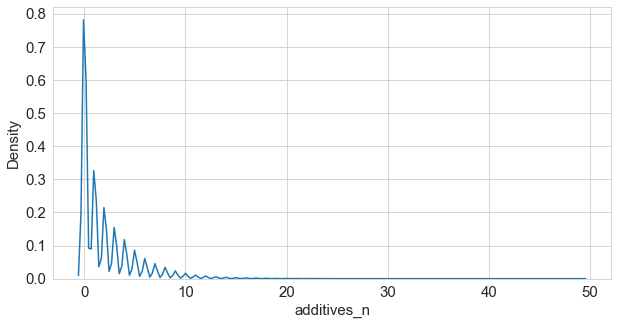

In [109]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['additives_n'],hist = False)

<AxesSubplot:xlabel='ingredients_from_palm_oil_n', ylabel='Density'>

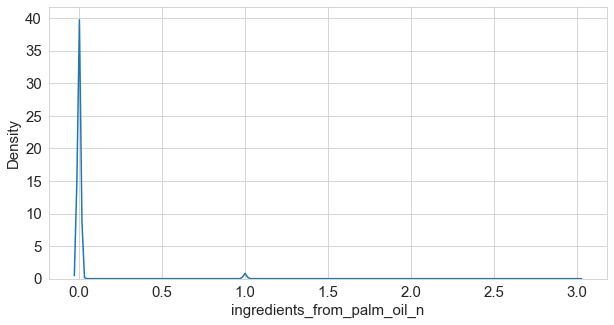

In [110]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['ingredients_from_palm_oil_n'],hist = False)

<AxesSubplot:xlabel='ingredients_that_may_be_from_palm_oil_n', ylabel='Density'>

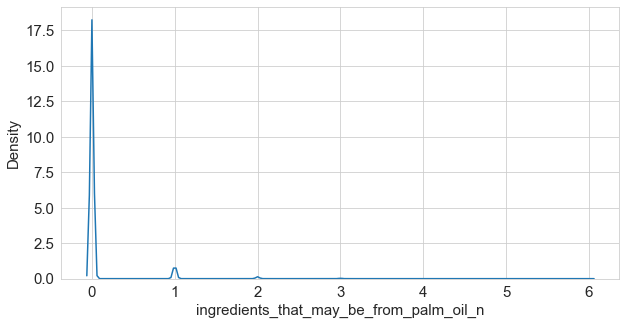

In [111]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['ingredients_that_may_be_from_palm_oil_n'],hist = False)

<AxesSubplot:xlabel='ingredients_that_may_be_from_palm_oil_n', ylabel='Density'>

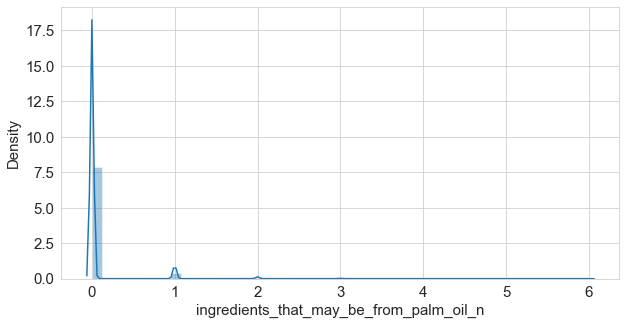

In [112]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['ingredients_that_may_be_from_palm_oil_n'])

<AxesSubplot:xlabel='nova_group', ylabel='Density'>

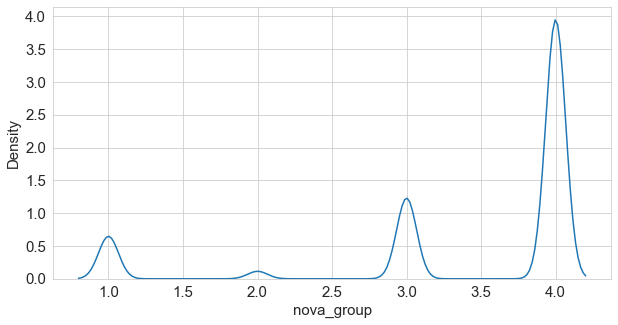

In [113]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['nova_group'],hist=False)

<AxesSubplot:xlabel='ecoscore_score_fr', ylabel='Density'>

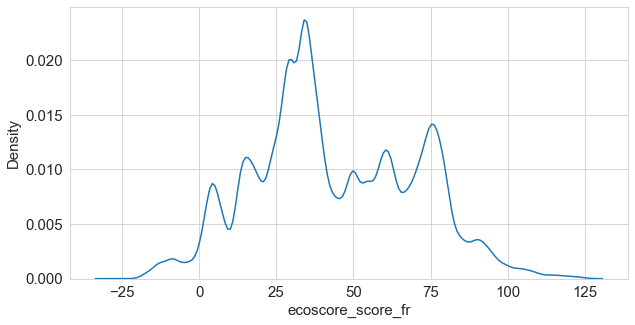

In [114]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['ecoscore_score_fr'],hist = False)

<AxesSubplot:xlabel='energy-kcal_100g', ylabel='Density'>

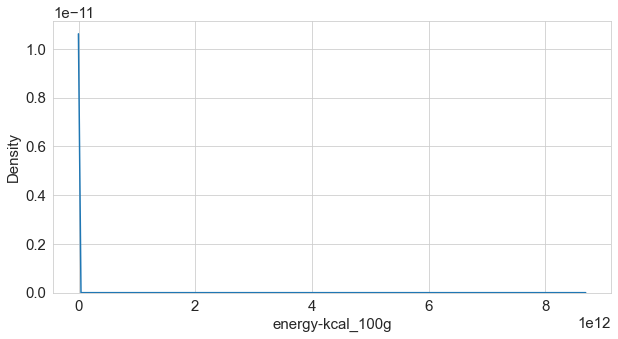

In [115]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['energy-kcal_100g'],hist = False)

<AxesSubplot:xlabel='energy_100g', ylabel='Density'>

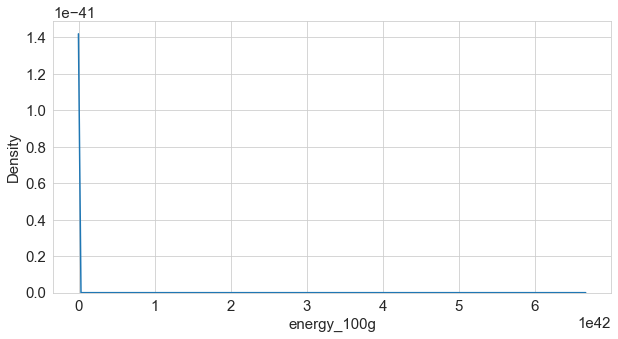

In [116]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['energy_100g'], hist = False)

<AxesSubplot:xlabel='fat_100g', ylabel='Density'>

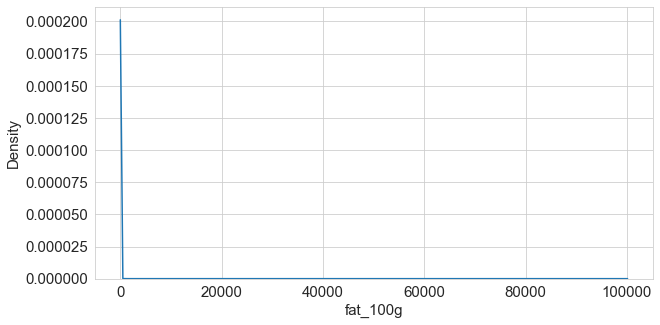

In [117]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['fat_100g'],hist = False)

<AxesSubplot:xlabel='saturated-fat_100g', ylabel='Density'>

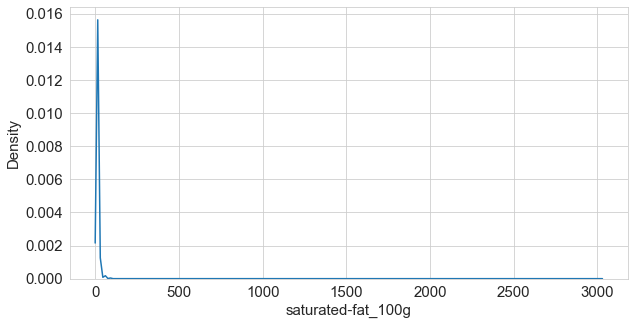

In [118]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['saturated-fat_100g'],hist = False)

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='Density'>

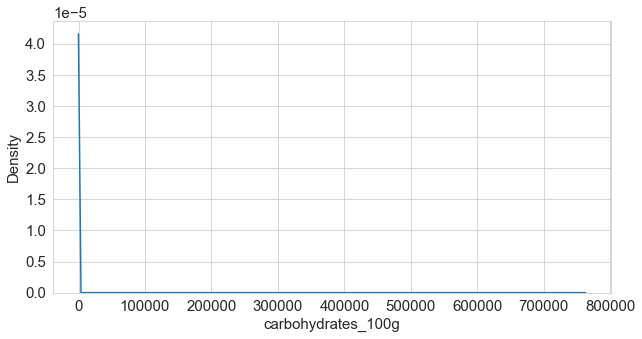

In [119]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['carbohydrates_100g'],hist = False)

<AxesSubplot:xlabel='sugars_100g', ylabel='Density'>

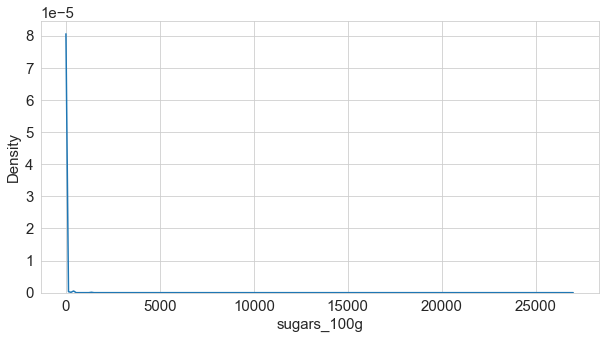

In [120]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['sugars_100g'],hist = False)

<AxesSubplot:xlabel='fiber_100g', ylabel='Density'>

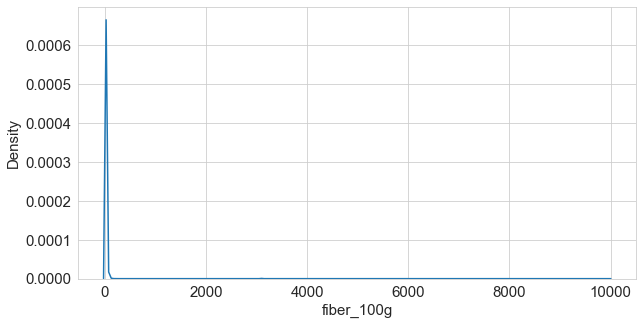

In [121]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['fiber_100g'],  hist = False)

<AxesSubplot:xlabel='proteins_100g', ylabel='Density'>

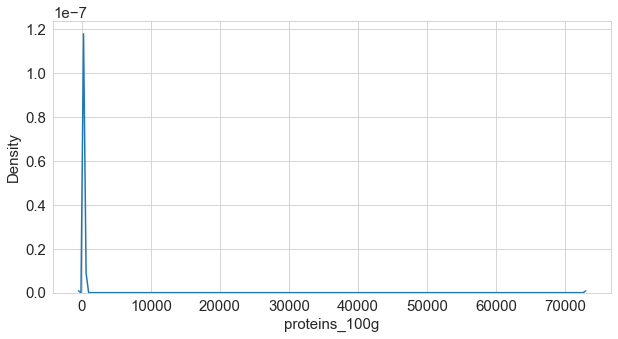

In [122]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['proteins_100g'],hist=False)

<AxesSubplot:xlabel='salt_100g', ylabel='Density'>

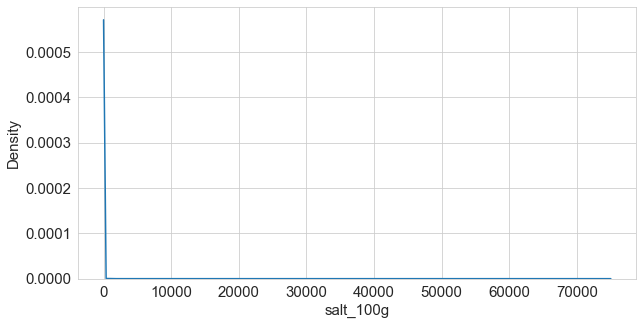

In [123]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['salt_100g'],hist = False)

<AxesSubplot:xlabel='sodium_100g', ylabel='Density'>

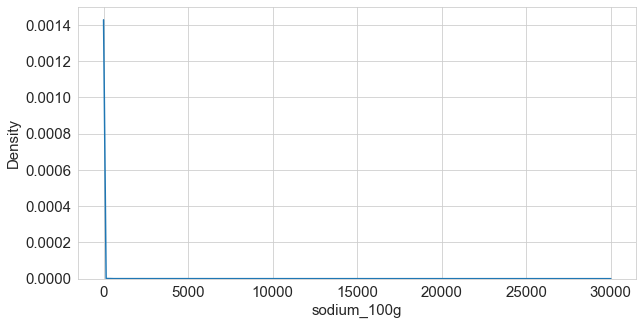

In [124]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['sodium_100g'],hist = False)

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Density'>

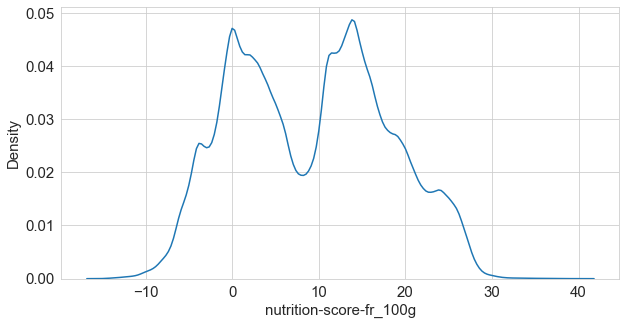

In [125]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data['nutrition-score-fr_100g'],hist = False)

<AxesSubplot:xlabel='nutriscore_score', ylabel='Density'>

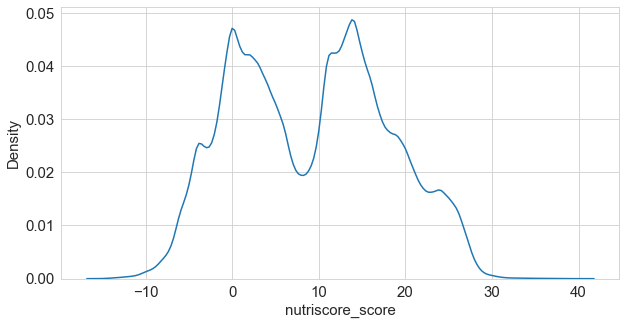

In [126]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(num_data["nutriscore_score"],hist = False)

On voit qu'on a beaucoup de valeurs manquantes dans certaines variables et qui ne seront pas utiles pour la suite de mon analyse, donc nous allons les supprimer.

In [127]:
num_data = num_data.drop(columns=['serving_quantity','nova_group',"ingredients_from_palm_oil_n",'energy-kcal_100g',
                       "ingredients_that_may_be_from_palm_oil_n",'additives_n','nutrition-score-fr_100g','ecoscore_score_fr'])

In [128]:
# Afficher 5 lignes aléatoires
num_data.sample(5)

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
578100,14.0,2427.0,44.200000,8.600000,25.900000,8.600000,NaN,18.200000,1.960000,0.784000
347701,NaN,858.0,11.111111,3.846154,23.076923,23.076923,NaN,4.273504,0.138889,0.055556
1530931,NaN,2042.0,22.000000,2.500000,65.000000,2.000000,NaN,5.200000,0.890000,0.356000
464,NaN,1301.0,15.000000,9.700000,38.000000,16.000000,NaN,4.900000,0.920000,0.368000
1599625,NaN,2510.0,66.000000,6.000000,3.000000,2.000000,NaN,1.000000,0.460000,0.184000


Aprés une étude séparée des variables qualitatitives et quantitatives , je fais la concaténation des deux datasets pour obtenir le dataset final

In [129]:
# Concaténation des deux dataset
df_final= pd.concat([cat_data,num_data], axis=1)
df_final.sample(5)

,code,creator,created_datetime,last_modified_datetime,product_name,quantity,brands,categories_en,labels_en,countries_en,additives_en,nutriscore_grade,pnns_groups_1,pnns_groups_2,states_en,main_category,main_category_en,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
880939,4015600782702,kiliweb,2019-10-19T07:18:25Z,2019-10-19T07:18:27Z,Nuciola aux éclats de noisettes,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,"To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,1745.0,20.0,2.0,52.0,27.0,NaN,5.1,0.50,0.200
376603,0860640000194,org-database-usda,2020-04-23T17:59:13Z,2020-04-23T17:59:13Z,Kopi tubruk cafe latte,NaN,NaN,"beverages,dried products,dried products to be ...",NaN,United States,"E340 - Potassium phosphates,E340ii - Dipotassi...",NaN,beverages,sweetened beverages,"To be completed,Nutrition facts completed,Ingr...",en:dehydrated-beverages,Dehydrated beverages,NaN,1343.0,26.0,20.0,NaN,NaN,NaN,24.0,NaN,NaN
221308,00966887,kiliweb,2021-07-06T16:01:35Z,2021-07-06T16:01:38Z,Buffalo Style Chicken Wrap,NaN,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN,"To be completed,Nutrition facts completed,Ingr...",NaN,NaN,3.0,335.0,7.2,1.2,3.2,3.2,0.8,0.8,0.60,0.240
502804,2968589002441,kiliweb,2021-04-17T12:43:23Z,2021-04-17T12:43:24Z,Le biscuit,NaN,NaN,NaN,NaN,Spain,NaN,NaN,NaN,NaN,"To be completed,Nutrition facts completed,Ingr...",NaN,NaN,11.0,916.0,7.2,4.3,27.2,3.9,0.0,9.8,1.18,0.472
1576659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1749.0,5.0,2.4,11.5,3.6,NaN,2.2,0.07,0.028


In [130]:
# La forme du dataset final
df_final.shape

(1671180, 27)

<AxesSubplot:>

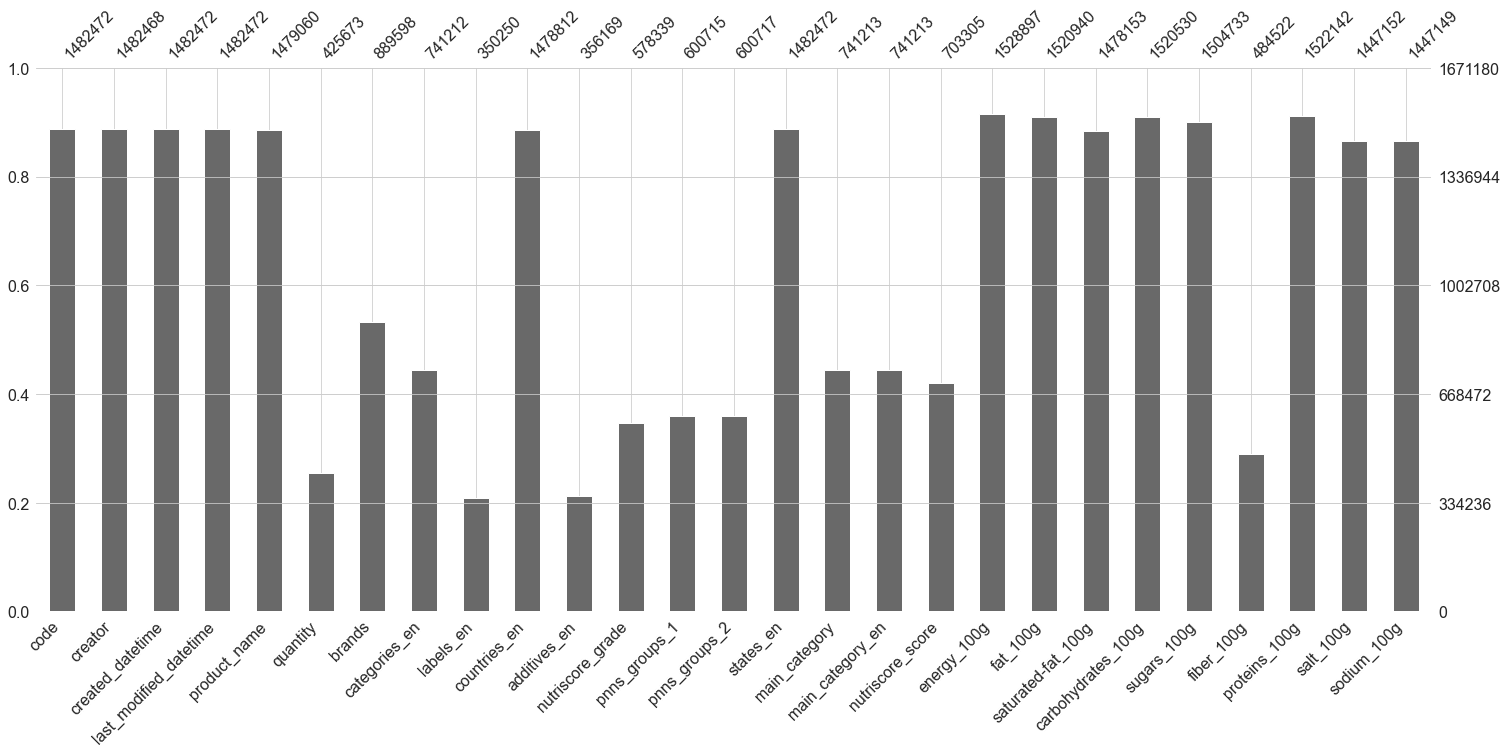

In [131]:
# Visualiser le taux de remplisssage de chaque colonne du dataset final
msno.bar(df_final)

In [132]:
# Description statistique des variables quantitatives
df_final.describe()

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,703305.000000,1.528897e+06,1.520940e+06,1.478153e+06,1.520530e+06,1.504733e+06,484522.000000,1.522142e+06,1.447152e+06,1.447149e+06
mean,9.124091,4.359717e+36,1.388652e+01,5.103549e+00,2.886282e+01,1.319234e+01,3.108711,8.742365e+00,2.061022e+00,8.244307e-01
std,8.852574,5.390728e+39,1.193601e+02,9.257326e+00,6.399181e+02,2.983257e+01,17.908069,6.261711e+01,8.871502e+01,3.547335e+01
min,-15.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-20.000000,-5.000000e+02,0.000000e+00,0.000000e+00
25%,1.000000,4.180000e+02,7.700000e-01,1.000000e-01,3.500000e+00,6.000000e-01,0.000000,1.300000e+00,7.250000e-02,2.900000e-02
50%,10.000000,1.080000e+03,7.000000e+00,1.800000e+00,1.514288e+01,3.570000e+00,1.600000,6.000000e+00,5.700000e-01,2.280000e-01
75%,16.000000,1.674000e+03,2.121000e+01,7.100000e+00,5.300000e+01,1.791000e+01,3.600000,1.235000e+01,1.400000e+00,5.600000e-01
max,40.000000,6.665559e+42,1.001000e+05,3.030000e+03,7.629390e+05,2.700000e+04,10000.000000,7.300000e+04,7.500000e+04,3.000000e+04


On voit la présence de valeurs abérantes dans certaines variables comme les nutriments et la valeur énergétique avec les valeurs minimum et maximum , et aura des impacte sur l'écart type

In [133]:
# Sélection des colonnes numériques 
df_numeric = df_final.select_dtypes(include=["int64","float"]).columns

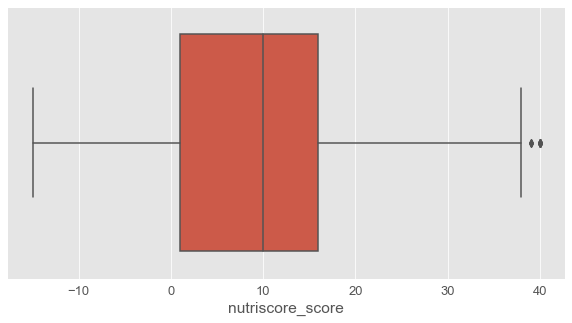

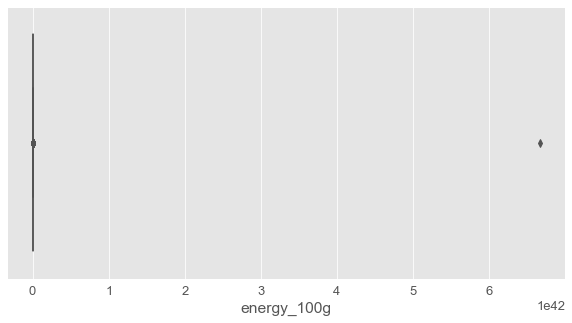

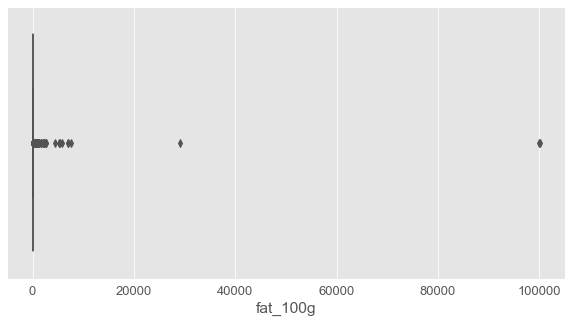

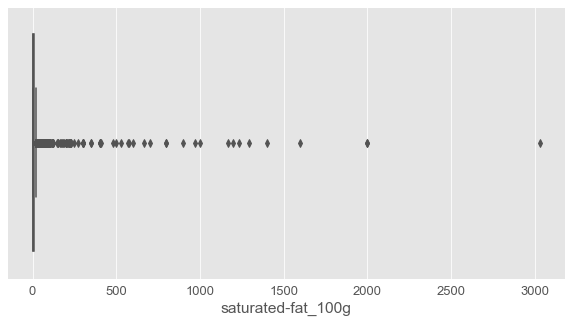

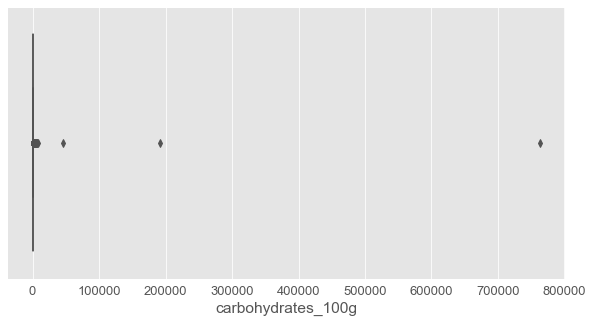

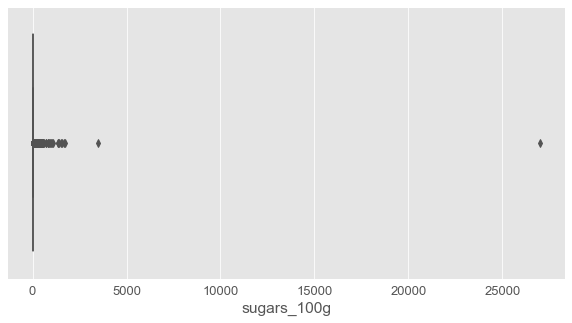

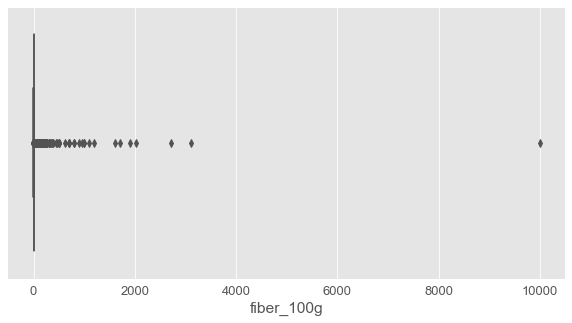

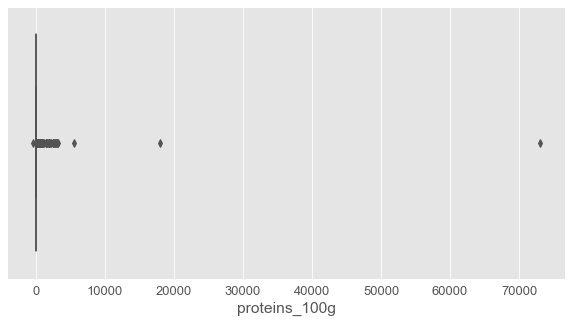

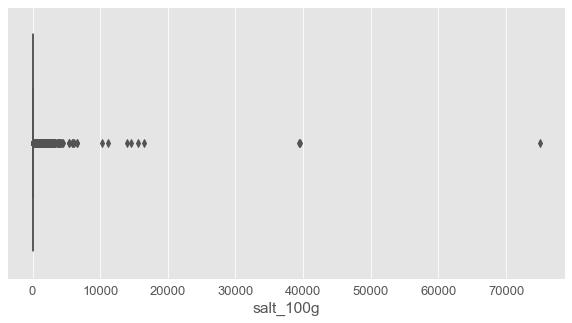

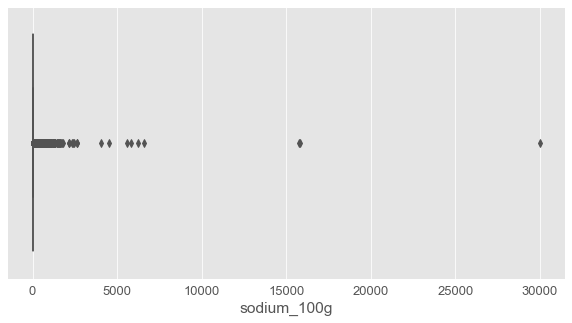

In [134]:
# Distribution des variables numériques aprés suppressesion de valeurs abérantes
for var in df_final.columns:
    if df_final[var].dtypes == 'float64':
        plt.style.use('ggplot')
        plt.rcParams.update({ "font.size" : 13})
        plt.figure(figsize=(10,5))
        sns.boxplot(x=var, data=df_final,  showfliers = True)
        plt.show()

In [135]:
# Afficher la valeur maximale de l'énergie
df_final[df_final["energy_100g"] == df_final["energy_100g"].max()]

,code,creator,created_datetime,last_modified_datetime,product_name,quantity,brands,categories_en,labels_en,countries_en,additives_en,nutriscore_grade,pnns_groups_1,pnns_groups_2,states_en,main_category,main_category_en,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
574102,3250392697549,kiliweb,2018-12-12T16:32:44Z,2021-01-20T15:06:26Z,Bloc de foie gras de canard avec morceau,300 g,Netto,"fish and meat and eggs,foies gras,foies gras f...",NaN,France,"E250 - Sodium nitrite,E300 - Ascorbic acid",E,salty snacks,salty and fatty products,"To be completed,Nutrition facts completed,Ingr...",fr:bloc-de-foie-gras-avec-morceaux,fr:Bloc de foie gras avec morceaux,NaN,6.665559e+42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La plus grande valeur maximale de l'énergie est mal renseignée

#### Remplaçons toutes les valeurs abérantes minimum et maximum (0,-1 ou 999999...) par des valeurs nulles

In [136]:
# Suppression des lignes dont toutes les valeurs numériques sont égale à 0 ou nulles
df_final = df_final.loc[~((df_final[df_numeric] == 0) 
                                    | (df_final[df_numeric].isnull())).all(axis=1)].reset_index(drop=True)

In [137]:
#On supprime les lignes contenant des valeurs négatives et des max aberrants
df_final = df_final[~(df_final[df_numeric] < 0).any(axis=1)].reset_index(drop=True)

In [138]:
#On supprime les lignes contenant des valeurs max aberrants
df_final = df_final[~(df_final[df_numeric].isin([999999,9999999])).any(axis=1)].reset_index(drop=True)

### Définissons une liste des variables suffixées de _100g de produits

In [139]:
nutriment_100g = ['proteins_100g','fat_100g','carbohydrates_100g','sugars_100g','salt_100g',
                  'sodium_100g','saturated-fat_100g','fiber_100g']

Ces variables nous indiquent la quantité de nutriment pour 100g de produit

Nous allons supprimer les lignes dont au moins une des variables de nutriments est supérieur au seuil

In [140]:
# Suppression des lignes ou l'une des variables est supérieur à 100
df_final = df_final[~(df_final[nutriment_100g] > 100).any(axis = 1)].reset_index(drop = True)

les valeurs de saturated-fat_100g ne peuvent pas être supérieurs à fat_100g, de même pour les valeurs de sodium_100g qui ne peuvent pas être supérieurs à salt_100g.Nous allons donc supprimer les lignes qui répondent pas à ces conditions :

In [141]:
# Suppression des lignes qui ne répondent pas à ces conditions
df_final = df_final[~((df_final['saturated-fat_100g'] > df_final['fat_100g']) 
                                | (df_final['sodium_100g'] > df_final['salt_100g']))].reset_index(drop = True)

Les densité d'energie maximales pour 100g sont de 3700 kJ/100g , nous allons donc supprimer toutes les lignes dont la variable energy_100g est supérieur à 3700 

In [142]:
# Suppression des lignes qui ne répondent pas à cette condition
df_final = df_final[~(df_final['energy_100g'] > 3700)].reset_index(drop = True)

In [143]:
# Description statistique des variables quantitatives
df_final.describe()

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,580699.000000,1.378025e+06,1.375490e+06,1.326909e+06,1.375327e+06,1.354387e+06,396964.000000,1.376889e+06,1.287630e+06,1.287628e+06
mean,11.571170,1.167909e+03,1.413593e+01,5.436103e+00,2.894898e+01,1.422187e+01,2.710743,8.780647e+00,1.471692e+00,5.886829e-01
std,7.516282,7.713477e+02,1.684462e+01,7.710938e+00,2.807585e+01,2.009555e+01,4.592237,9.993110e+00,4.953859e+00,1.981593e+00
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000,4.850000e+02,1.000000e+00,2.000000e-01,3.700000e+00,7.400000e-01,0.000000,1.500000e+00,1.000000e-01,4.000000e-02
50%,12.000000,1.140000e+03,8.300000e+00,2.222222e+00,1.700000e+01,4.100000e+00,1.400000,6.000000e+00,7.000000e-01,2.800000e-01
75%,17.000000,1.700000e+03,2.230000e+01,7.900000e+00,5.390000e+01,2.100000e+01,3.500000,1.250000e+01,1.500000e+00,6.000000e-01
max,40.000000,3.700000e+03,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,4.000000e+01


Aprés quelques nettoyages, on voit qu'on a des résultats plus cohérent des valeurs de minimum et maximum , d'écart type et la mediane

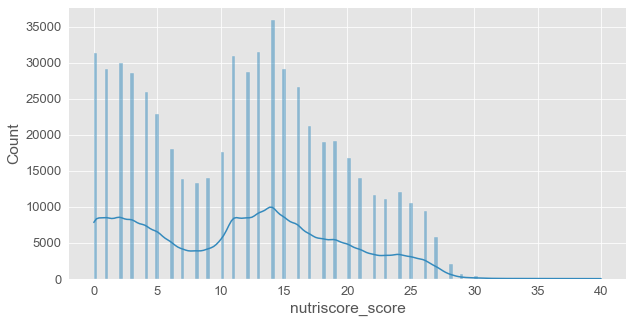

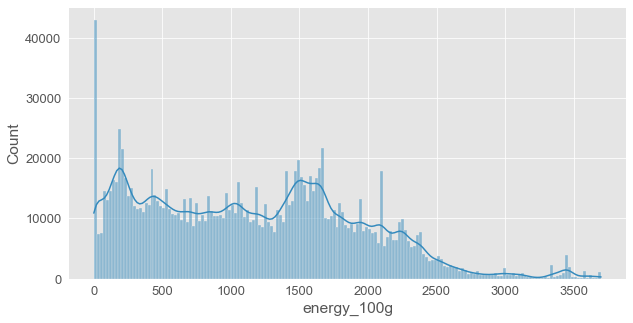

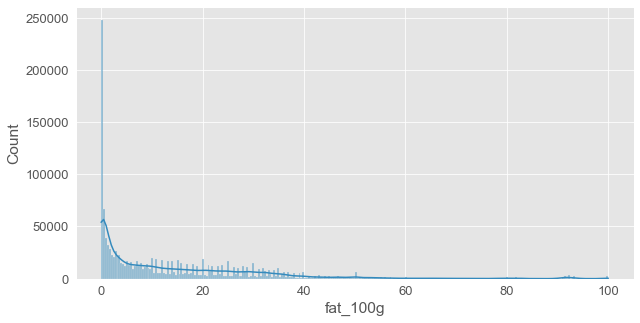

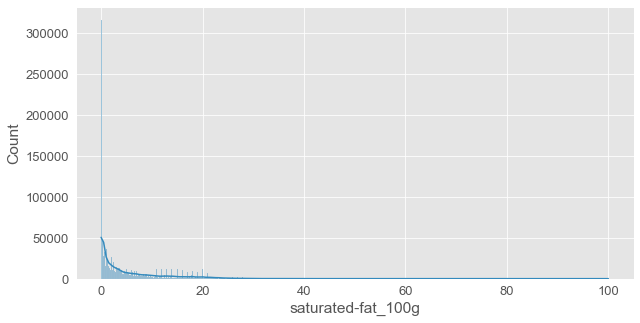

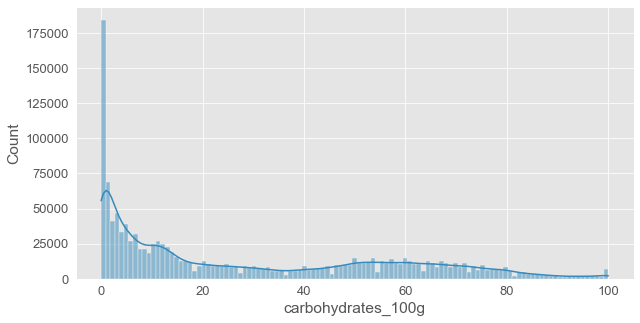

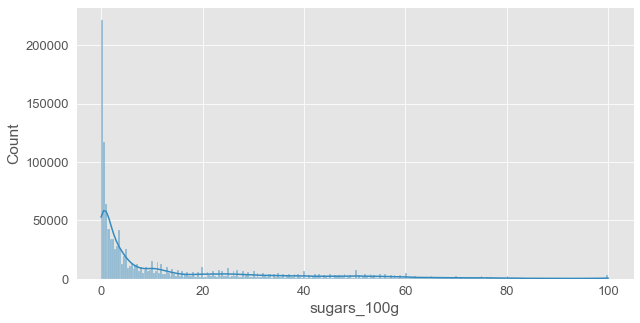

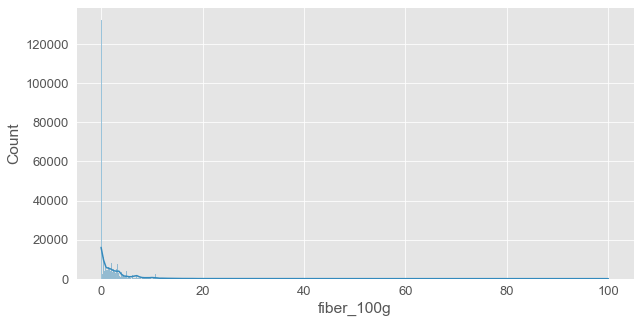

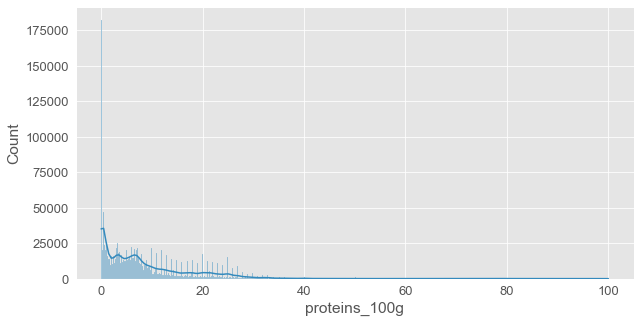

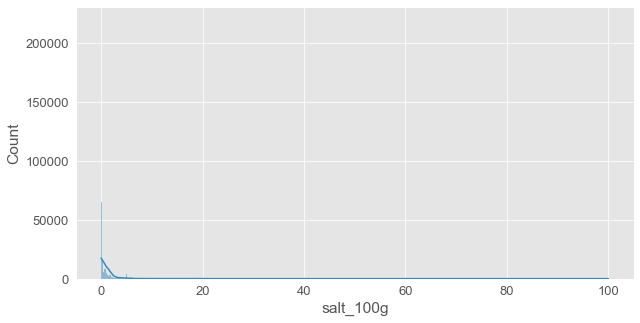

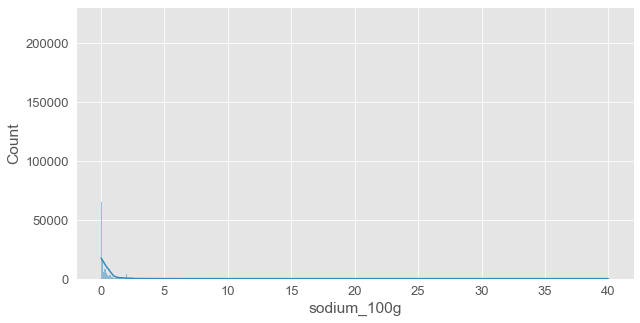

In [144]:
# Distribution des variables numériques aprés suppressesion de valeurs abérantes
for var in df_final.columns:
    if df_final[var].dtypes == 'float64':
        plt.style.use('ggplot')
        plt.rcParams.update({ "font.size" : 13})
        plt.figure(figsize=(10,5))
        sns.histplot(x=var, data=df_final, kde=True)
        plt.show()

In [155]:
# Nombre de valeurs nulles par colonnes
df_final.isnull().sum().sort_values(ascending=False)

labels_en                 1095109
additives_en              1091290
quantity                  1032205
fiber_100g                 989167
nutriscore_grade           907122
pnns_groups_1              888603
pnns_groups_2              888602
nutriscore_score           805432
categories_en              772161
main_category              772160
main_category_en           772160
brands                     646564
countries_en               159639
product_name               159416
creator                    156612
code                       156609
states_en                  156609
last_modified_datetime     156609
created_datetime           156609
sodium_100g                 98503
salt_100g                   98501
saturated-fat_100g          59222
sugars_100g                 31744
carbohydrates_100g          10804
fat_100g                    10641
proteins_100g                9242
energy_100g                  8106
dtype: int64

In [156]:
# Afficher le pourcentage de valeurs manquantes
pourcentage_valeurs_manquants(df_final)

energy_100g               0.005848
proteins_100g             0.006667
fat_100g                  0.007677
carbohydrates_100g        0.007794
sugars_100g               0.022901
saturated-fat_100g        0.042725
salt_100g                 0.071062
sodium_100g               0.071063
states_en                 0.112983
code                      0.112983
created_datetime          0.112983
last_modified_datetime    0.112983
creator                   0.112985
product_name              0.115008
countries_en              0.115169
brands                    0.466452
main_category             0.557061
main_category_en          0.557061
categories_en             0.557062
nutriscore_score          0.581065
pnns_groups_2             0.641066
pnns_groups_1             0.641067
nutriscore_grade          0.654427
fiber_100g                0.713617
quantity                  0.744666
additives_en              0.787292
labels_en                 0.790047
dtype: float64

In [157]:
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.title("Nuage de mots les plus représentés" "\n dans le dataset final")
    plt.imshow(wordcloud)
    plt.show()

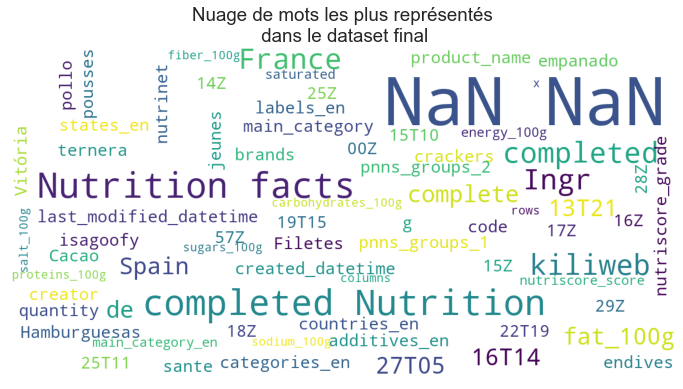

In [158]:
# Appel à la fonction pour afficher le nuage de points
show_wordcloud(data= df_final, title = None) 

### Compléter les valeurs manquantes

Ce pendant garder les variables qui nous seront utiles pour la suite de l'analyse même s'ils ont beaucoup de valeurs manquant car on pourra les compléter en faisant une imputation par la median en présence des outliers ou par la moyenne en absence des outliers 

In [159]:
# Pour les variables numériques remplacer les valeurs manquantes par la median 
median = df_final.median()
df_final= df_final.fillna(median)

In [160]:
# Nombre de valeurs nulles par colonnes
df_final.isnull().sum().sort_values(ascending=False)

labels_en                 1095109
additives_en              1091290
quantity                  1032205
nutriscore_grade           907122
pnns_groups_1              888603
pnns_groups_2              888602
categories_en              772161
main_category              772160
main_category_en           772160
brands                     646564
countries_en               159639
product_name               159416
creator                    156612
last_modified_datetime     156609
created_datetime           156609
states_en                  156609
carbohydrates_100g              0
salt_100g                       0
proteins_100g                   0
fiber_100g                      0
sugars_100g                     0
code                            0
saturated-fat_100g              0
fat_100g                        0
energy_100g                     0
nutriscore_score                0
sodium_100g                     0
dtype: int64

In [161]:
df_final.shape

(1386131, 27)

In [162]:
df_final.columns

Index(['code', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'quantity', 'brands', 'categories_en', 'labels_en',
       'countries_en', 'additives_en', 'nutriscore_grade', 'pnns_groups_1',
       'pnns_groups_2', 'states_en', 'main_category', 'main_category_en',
       'nutriscore_score', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g'],
      dtype='object')

Les variables manquantes numeriques sont toutes complétées , nous allons sélectionner des variables pour la suite de l'analyse et pour le calcul du nutriscore

In [163]:
# Sauvegarder notre dataset pour la suite de l'analyse
df_final.to_csv("Xdf_final.csv")